# Day 1

1. 详细阅读项目overview和data介绍。(https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview)
2. 了解EDA的流程（Exploratory Data Analysis）
3. 找到training set (sales_train.csv) 中"item_cnt_day"和“item_price”的异常值（outliers），画图展示。
4. 将训练集中daily的销售数据，Aggregate成monthly level的数据。training set (sales_train.csv) 是daily级别。


备注： 

    item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
    item_price - current price of an item

### Loading the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_train = pd.read_csv('./data/sales_train.csv')

In [3]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [4]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


## 找到training set (sales_train.csv) 中"item_cnt_day"和“item_price”的异常值（outliers），画图展示。

In [5]:
plt.rcParams['figure.figsize'] = [8, 5]

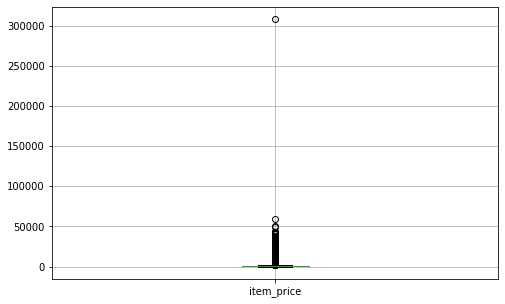

In [6]:
sales_train[['item_price']].boxplot()
#boxplot = sales_train.boxplot(column= ['item_price','item_cnt_day'])

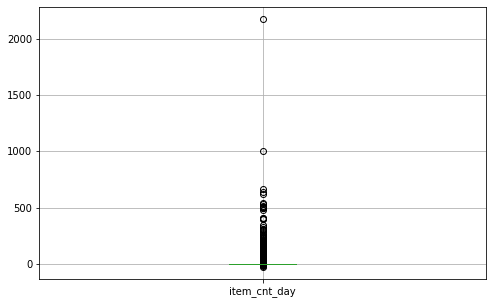

In [7]:
sales_train[['item_cnt_day']].boxplot()

In [8]:
sales_train[sales_train['item_price']<=0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


One data sample has a negative item_price, it should be replaced with the mean. 

In [9]:
# returns the outliers 

def outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] < fence_low)| (df_in[col_name] > fence_high)]
    return df_out

In [10]:
outlier(sales_train,'item_price').sort_values(by = 'item_price')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2146669,13.11.2014,22,18,5820,2124.15,1.0
2934883,21.10.2015,33,25,3027,2124.15,1.0
1162403,23.12.2013,11,12,1856,2124.15,1.0
968091,21.10.2013,9,30,3329,2124.15,1.0
2514898,07.03.2015,26,54,15935,2124.16,1.0
...,...,...,...,...,...,...
2910156,29.10.2015,33,12,13403,42990.00,1.0
2327159,29.01.2015,24,12,7241,49782.00,1.0
1488135,20.03.2014,14,25,13199,50999.00,1.0
885138,17.09.2013,8,12,11365,59200.00,1.0


In [11]:
outlier(sales_train,'item_cnt_day').sort_values(by = 'item_id')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
468956,06.05.2013,4,46,28,398.0,-1.0
90914,18.01.2013,0,50,29,2499.0,-1.0
125084,24.02.2013,1,42,30,399.0,4.0
153860,16.02.2013,1,23,30,399.0,2.0
153861,17.02.2013,1,23,30,399.0,3.0
...,...,...,...,...,...,...
2826954,20.08.2015,31,22,22167,299.0,3.0
2826955,28.08.2015,31,22,22167,299.0,2.0
2924952,14.10.2015,33,25,22167,299.0,2.0
1928987,28.08.2014,19,12,22167,299.0,2.0


## 将训练集中daily的销售数据，Aggregate成monthly level的数据。training set (sales_train.csv) 是daily级别。

In [12]:
sales_train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [13]:
'''
sales_train['date'] = pd.to_datetime(sales_train['date'])
sales_train['year'] = sales_train['date'].dt.year
sales_train['month'] = sales_train['date'].dt.month
sales_train_monthly = sales_train.groupby(['shop_id','item_id','year','month'],as_index = False).agg({'item_price':'mean','item_cnt_day':'sum'})
'''
sales_train_monthly = sales_train.groupby(['date_block_num','shop_id','item_id'], as_index = False).agg({'item_price':'mean','item_cnt_day':'sum'}).rename(columns = {'item_price':'avg_item_price','item_cnt_day':'item_cnt_month'})



In [14]:
sales_train_monthly.sort_values(by = 'item_id')

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
1101022,20,54,0,58.0,1.0
1015412,18,55,1,4490.0,1.0
1061583,19,55,1,4490.0,1.0
877718,15,55,1,4490.0,2.0
1102844,20,55,1,4490.0,1.0
...,...,...,...,...,...
167027,2,43,22168,798.5,1.0
473482,8,12,22168,799.0,1.0
11463,0,12,22168,799.0,1.0
107745,1,42,22168,799.0,1.0


## EDA 画点图看看

## 所有产品销售数量总和随时间的变化

In [15]:
monthly_change = sales_train.groupby(['date_block_num'], as_index = False).agg({'item_price':'mean','item_cnt_day':'sum'}).rename(columns = {'item_price':'avg_item_price','item_cnt_day':'item_cnt_month'})
monthly_change.head()

,date_block_num,avg_item_price,item_cnt_month
0,0,710.622127,131479.0
1,1,695.866856,128090.0
2,2,694.688063,147142.0
3,3,653.633797,107190.0
4,4,624.179993,106970.0


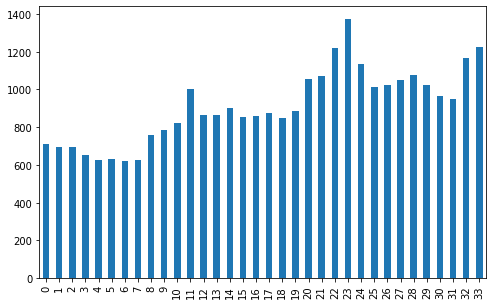

In [16]:
monthly_change['avg_item_price'].plot.bar()

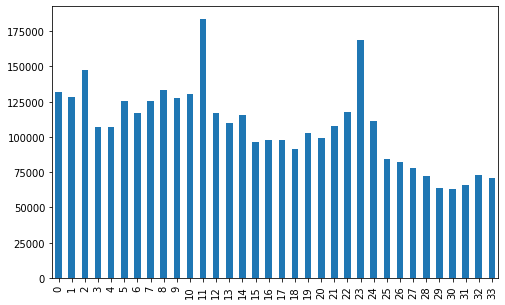

In [17]:
monthly_change['item_cnt_month'].plot.bar()

价格有波动，但总体趋势在上升，可以理解，因为通货膨胀物价上涨……
平均价格和销售额的波动曲线很相似，几乎同时上升下降。把数据标准化画在同一张图片上看看他们是不是真的一起变化👀

In [18]:
from sklearn import preprocessing

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
monthly_change_minmax = min_max_scaler.fit_transform(monthly_change)

In [20]:
monthly_change['item_cnt_month_min_max'] = monthly_change_minmax[:,2]
monthly_change['avg_item_price_min_max'] = monthly_change_minmax[:,1]

In [21]:
monthly_change.head()

,date_block_num,avg_item_price,item_cnt_month,item_cnt_month_min_max,avg_item_price_min_max
0,0,710.622127,131479.0,0.568366,0.122208
1,1,695.866856,128090.0,0.540161,0.102617
2,2,694.688063,147142.0,0.698722,0.101052
3,3,653.633797,107190.0,0.366219,0.046544
4,4,624.179993,106970.0,0.364388,0.007438


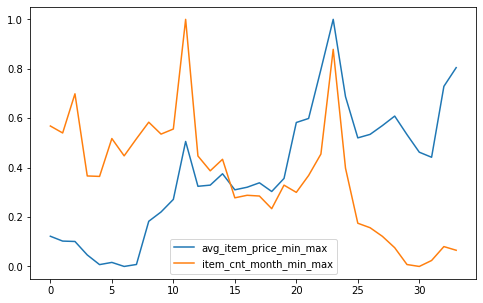

In [22]:
monthly_change[['avg_item_price_min_max','item_cnt_month_min_max']].plot.line()

In [23]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [24]:
items = pd.read_csv('./data/items.csv')
items 

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


## Exploring the best selling item categries

In [25]:
item_categories =  pd.read_csv('./data/item_categories.csv')
item_categories 

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


看不懂俄语，但是items里的数据太多不作处理了，用google sheet Google Translate 功能把item_categories 里的item_category_name 转换成英文，更好理解数据。

In [26]:
item_categories_English =  pd.read_csv('./data/item_categories_English.csv')
item_categories_English.drop('item_category_name',axis = 1)  #反正也看不懂 删了算了

,item_category_id,item_category_name_English
0,0,PC - Headsets / Headphones
1,1,Accessories - PS2
2,2,Accessories - PS3
3,3,Accessories - PS4
4,4,Accessories - PSP
...,...,...
79,79,System Tools
80,80,Utilities - Tickets
81,81,Net carriers (spire)
82,82,Net carriers (piece)


In [27]:
tmp1 = pd.merge(sales_train_monthly, items, on='item_id', how='left') 
sales_train_monthly1 = pd.merge(tmp1, item_categories_English, on='item_category_id', how='left') 

sales_train_monthly1  

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,item_name,item_category_id,item_category_name,item_category_name_English
0,0,0,32,221.0,6.0,1+1,40,Кино - DVD,Movie - DVD
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино - Blu-Ray,Movie - Blu-Ray
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,Movie - DVD
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,Movie - DVD
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,Music - MP3
...,...,...,...,...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0,Элемент питания DURACELL LR03-BC2,83,Элементы питания,batteries
1609120,33,59,22088,119.0,2.0,Элемент питания DURACELL LR06-BC2,83,Элементы питания,batteries
1609121,33,59,22091,179.0,1.0,Элемент питания DURACELL TURBO LR 03 2*BL,83,Элементы питания,batteries
1609122,33,59,22100,629.0,1.0,Энциклопедия Adventure Time,42,"Книги - Артбуки, энциклопедии","Books - artbook, encyclopedia"


In [28]:
sales_train_monthly1.drop(columns=['item_name','item_category_name'],inplace = True)

In [29]:
sales_train_monthly1

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,item_category_id,item_category_name_English
0,0,0,32,221.0,6.0,40,Movie - DVD
1,0,0,33,347.0,3.0,37,Movie - Blu-Ray
2,0,0,35,247.0,1.0,40,Movie - DVD
3,0,0,43,221.0,1.0,40,Movie - DVD
4,0,0,51,128.5,2.0,57,Music - MP3
...,...,...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0,83,batteries
1609120,33,59,22088,119.0,2.0,83,batteries
1609121,33,59,22091,179.0,1.0,83,batteries
1609122,33,59,22100,629.0,1.0,42,"Books - artbook, encyclopedia"


In [30]:
category_monthly = sales_train_monthly1.groupby(['item_category_id'], as_index = False).agg({'avg_item_price':'mean','item_cnt_month':'sum'}) 
category_monthly.sort_values(by = 'item_cnt_month', inplace = True)
category_monthly

,item_category_id,avg_item_price,item_cnt_month
51,51,129.000000,1.0
10,10,1998.000000,1.0
1,1,215.500000,2.0
53,53,282.333333,3.0
52,52,100.000000,3.0
...,...,...,...
37,37,400.055226,203284.0
19,19,1423.005469,254887.0
55,55,281.804765,348591.0
30,30,421.332928,456540.0


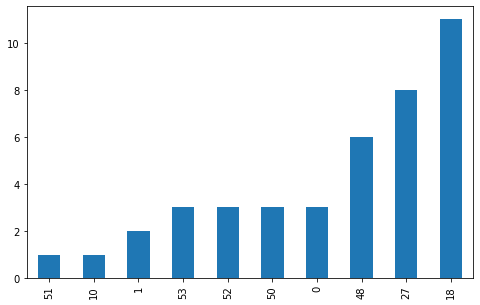

In [31]:
category_monthly['item_cnt_month'][0:10].plot.bar()

# Day 2

1. 随机挑选10个item，将销售曲线图画出（x轴是月份，y轴是item_cnt_month）
2. reformat原本aggregated后的monthly数据，成时间序列状。
3. 简单建模，尝试用0-32的月份的数据，去predict“33“的月份。

## 1. random select 10 items and plot the sales 

In [32]:
sales_train_monthly 

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
0,0,0,32,221.0,6.0
1,0,0,33,347.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,128.5,2.0
...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0
1609120,33,59,22088,119.0,2.0
1609121,33,59,22091,179.0,1.0
1609122,33,59,22100,629.0,1.0


In [33]:
random_10 = sales_train_monthly[['item_id']].sample(n=10)
random_10

,item_id
464856,472
1070676,5012
134844,14575
991640,6075
1439549,15739
1210990,15813
290759,3327
1445416,6445
995379,2639
898352,5070


In [34]:
random_10_sales = sales_train_monthly.loc[sales_train_monthly['item_id'].isin(random_10['item_id'])].reset_index()
random_10_sales 

,index,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
0,274,0,0,3327,1189.0,1.0
1,2557,0,1,3327,1189.0,2.0
2,2676,0,1,5070,1097.0,1.0
3,4700,0,3,2639,399.0,1.0
4,4816,0,3,5070,1590.0,1.0
...,...,...,...,...,...,...
2141,1604749,33,53,2639,449.0,1.0
2142,1606763,33,57,3327,149.0,1.0
2143,1606895,33,57,5012,299.0,1.0
2144,1607426,33,57,14575,199.0,1.0


In [35]:
random_10_sales['shop_id'] = random_10_sales['shop_id'].astype('object')
random_10_sale = random_10_sales.groupby(['item_id','date_block_num'],as_index = False).agg({'avg_item_price':'mean','item_cnt_month':'sum'})
random_10_sale
 

,item_id,date_block_num,avg_item_price,item_cnt_month
0,472,3,399.000000,1.0
1,472,4,399.000000,17.0
2,472,5,399.000000,24.0
3,472,6,399.000000,27.0
4,472,7,399.000000,37.0
...,...,...,...,...
194,15813,26,249.284615,14.0
195,15813,27,269.483333,8.0
196,15813,28,236.475000,4.0
197,15813,29,176.844000,5.0


In [36]:
def plot_each_item(df,item_id):
    fig = plt.figure(figsize=(25, 20), dpi=100)
    plt.plot(df['date_block_num'],df['item_cnt_month'],label = '.')
    plt.xlabel('date_block_num')
    plt.ylabel('item_cnt_month')
    plt.title('{}'.format(item_id))
    plt.savefig('./sales_plot/{}'.format(item_id))
    

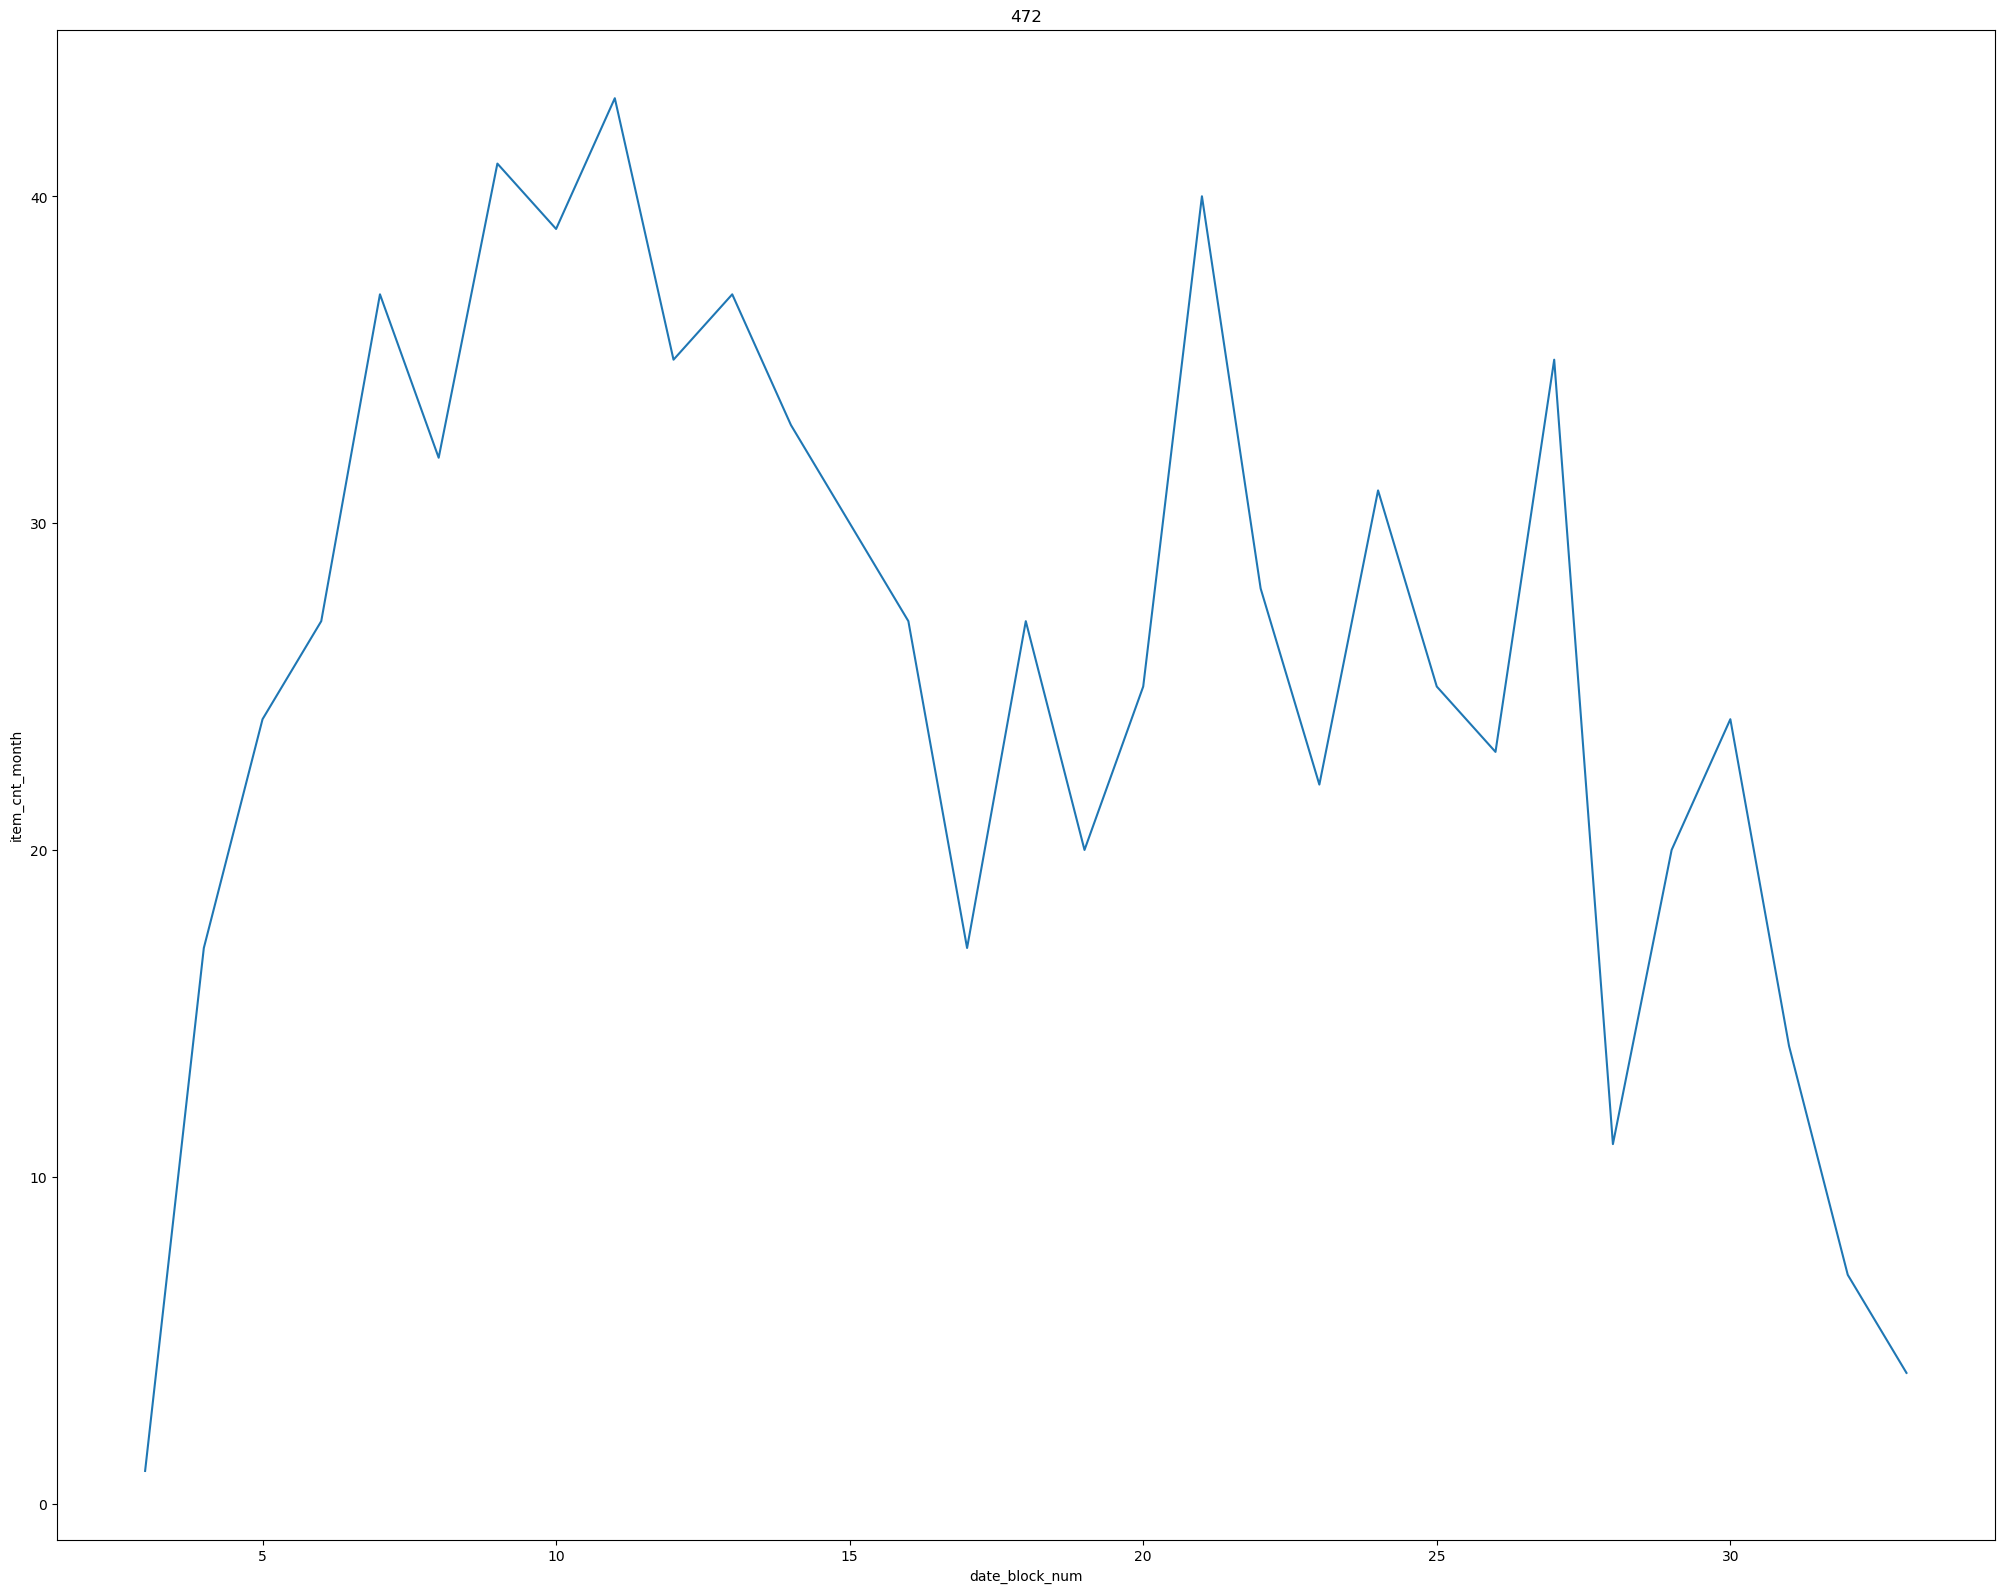

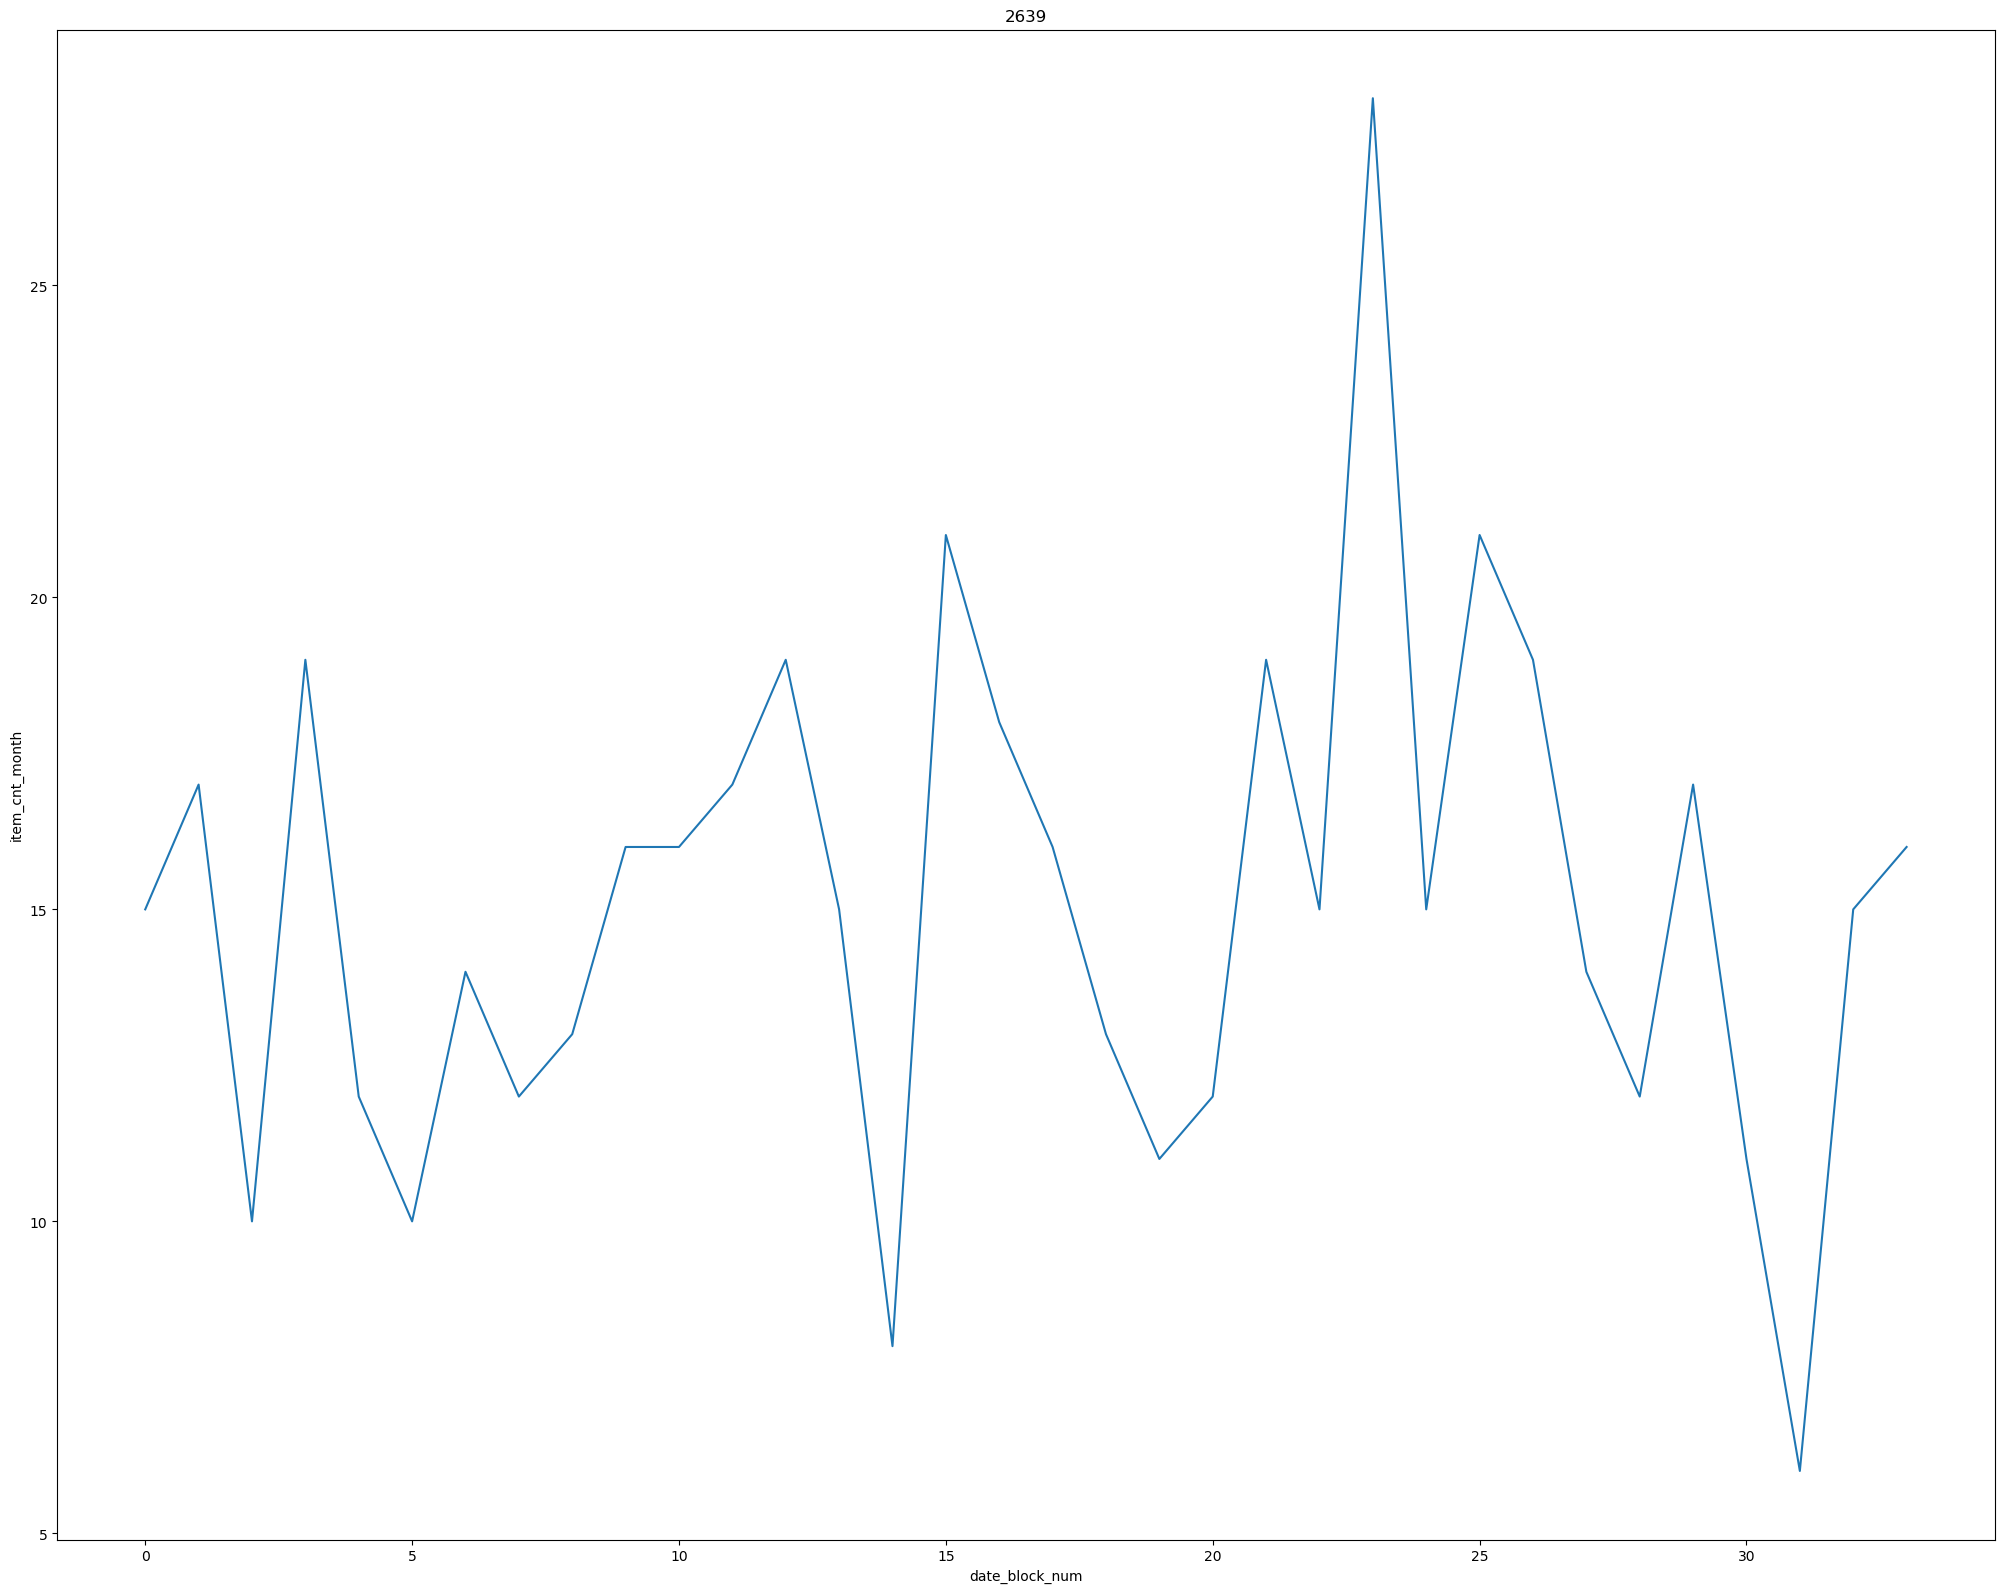

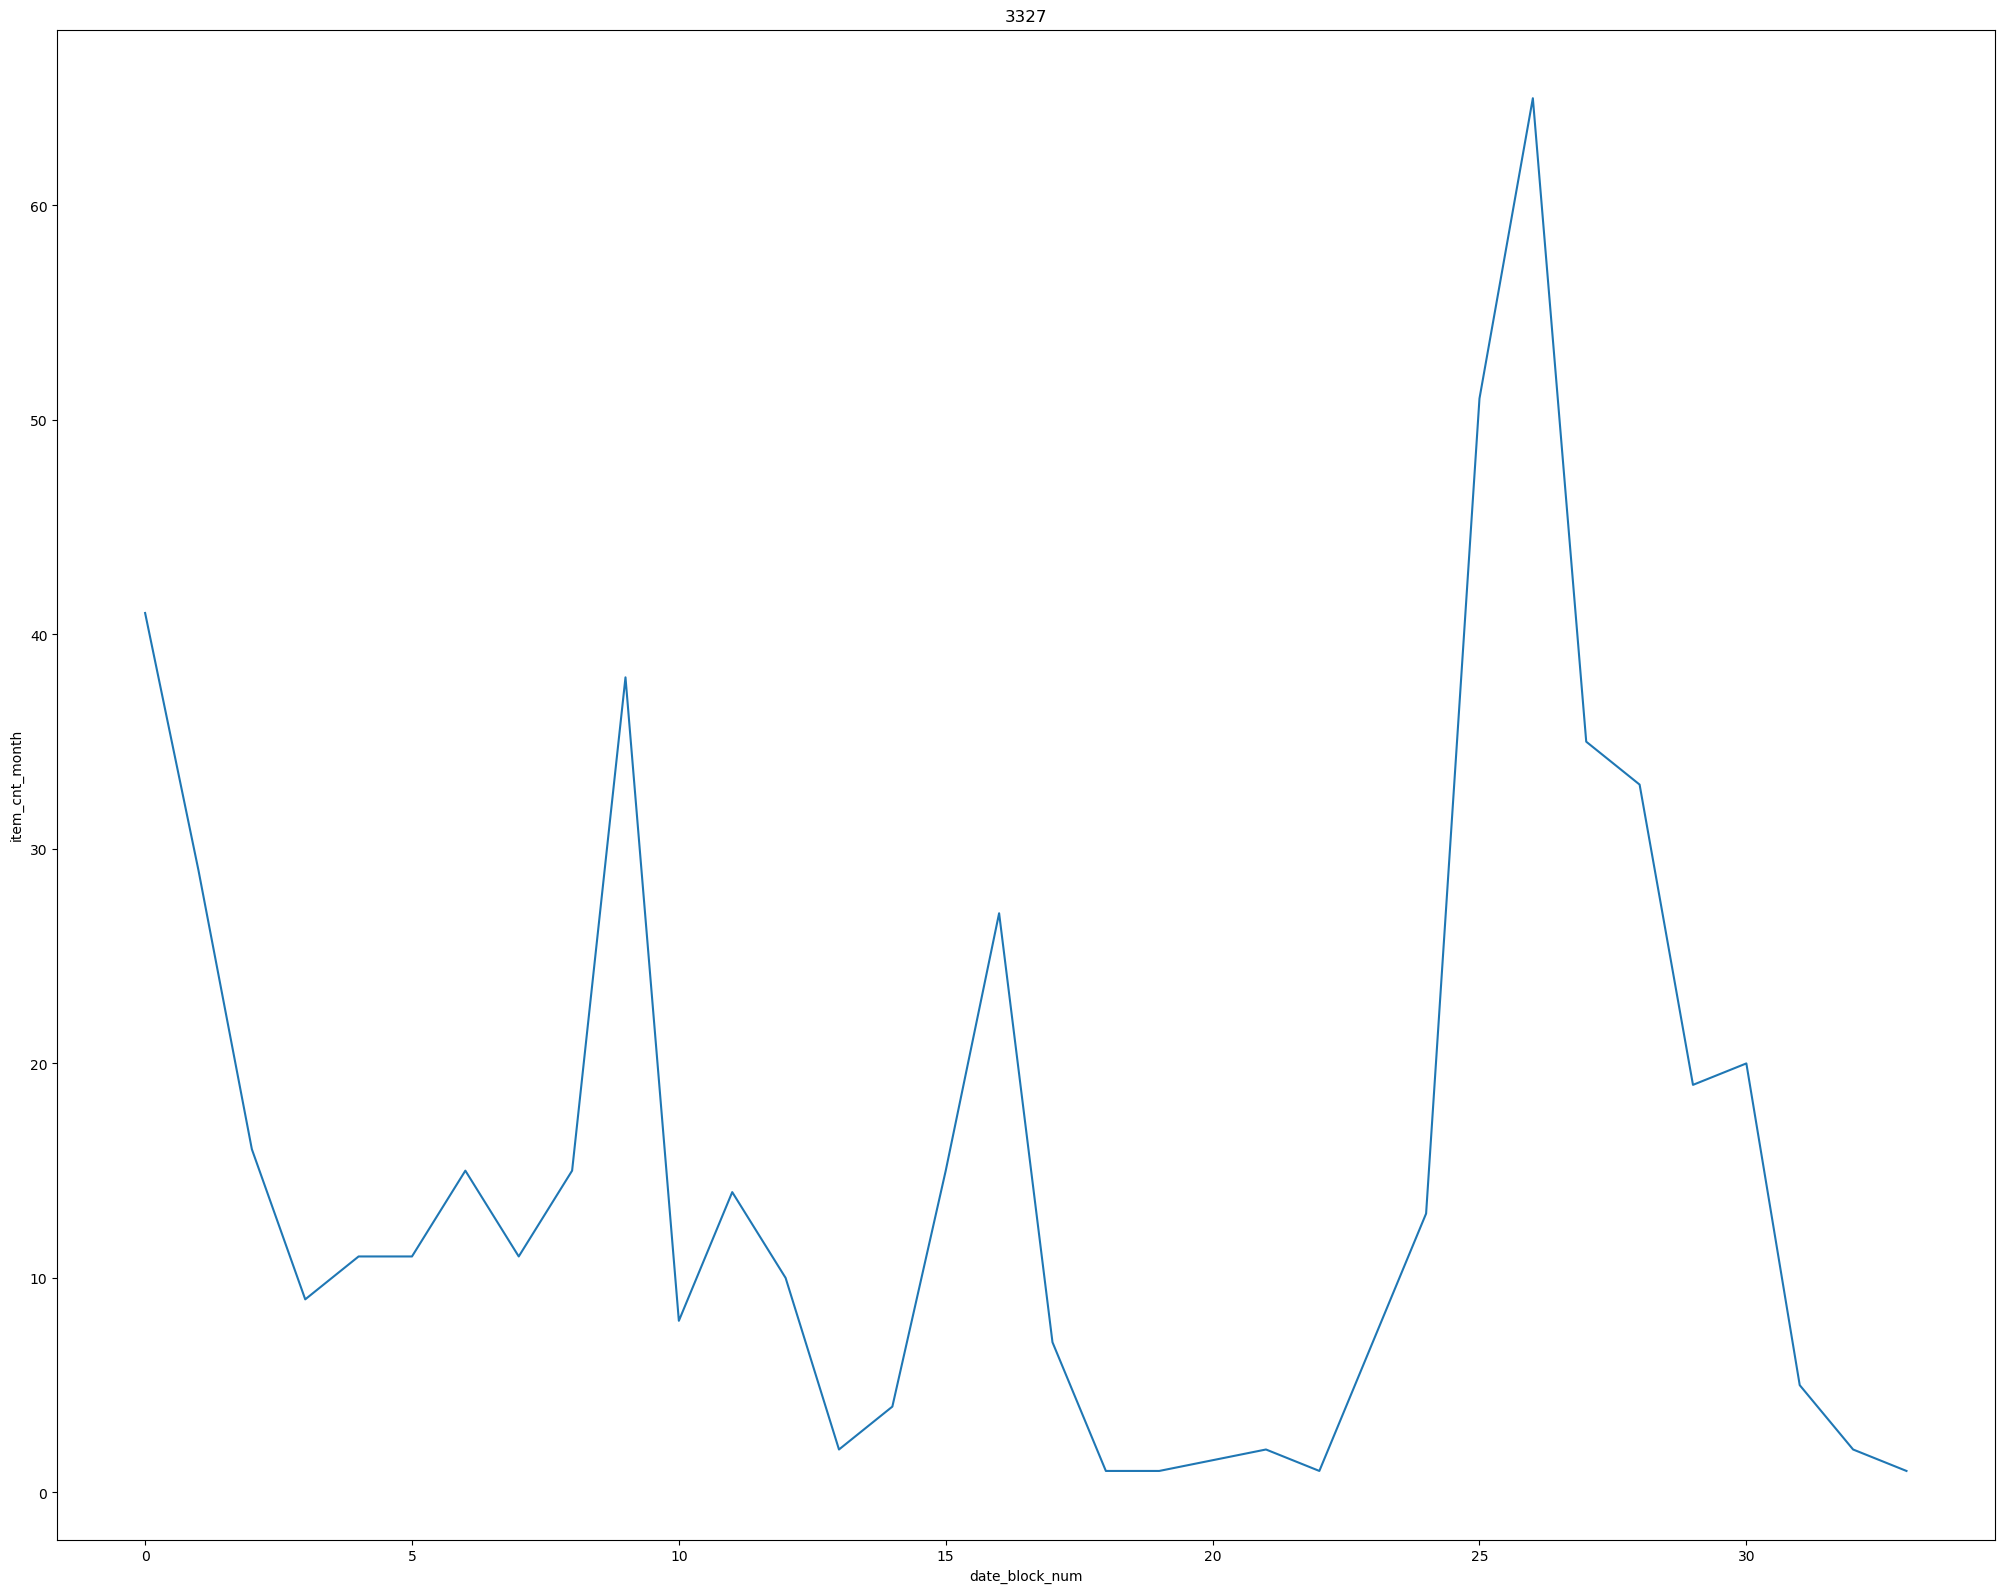

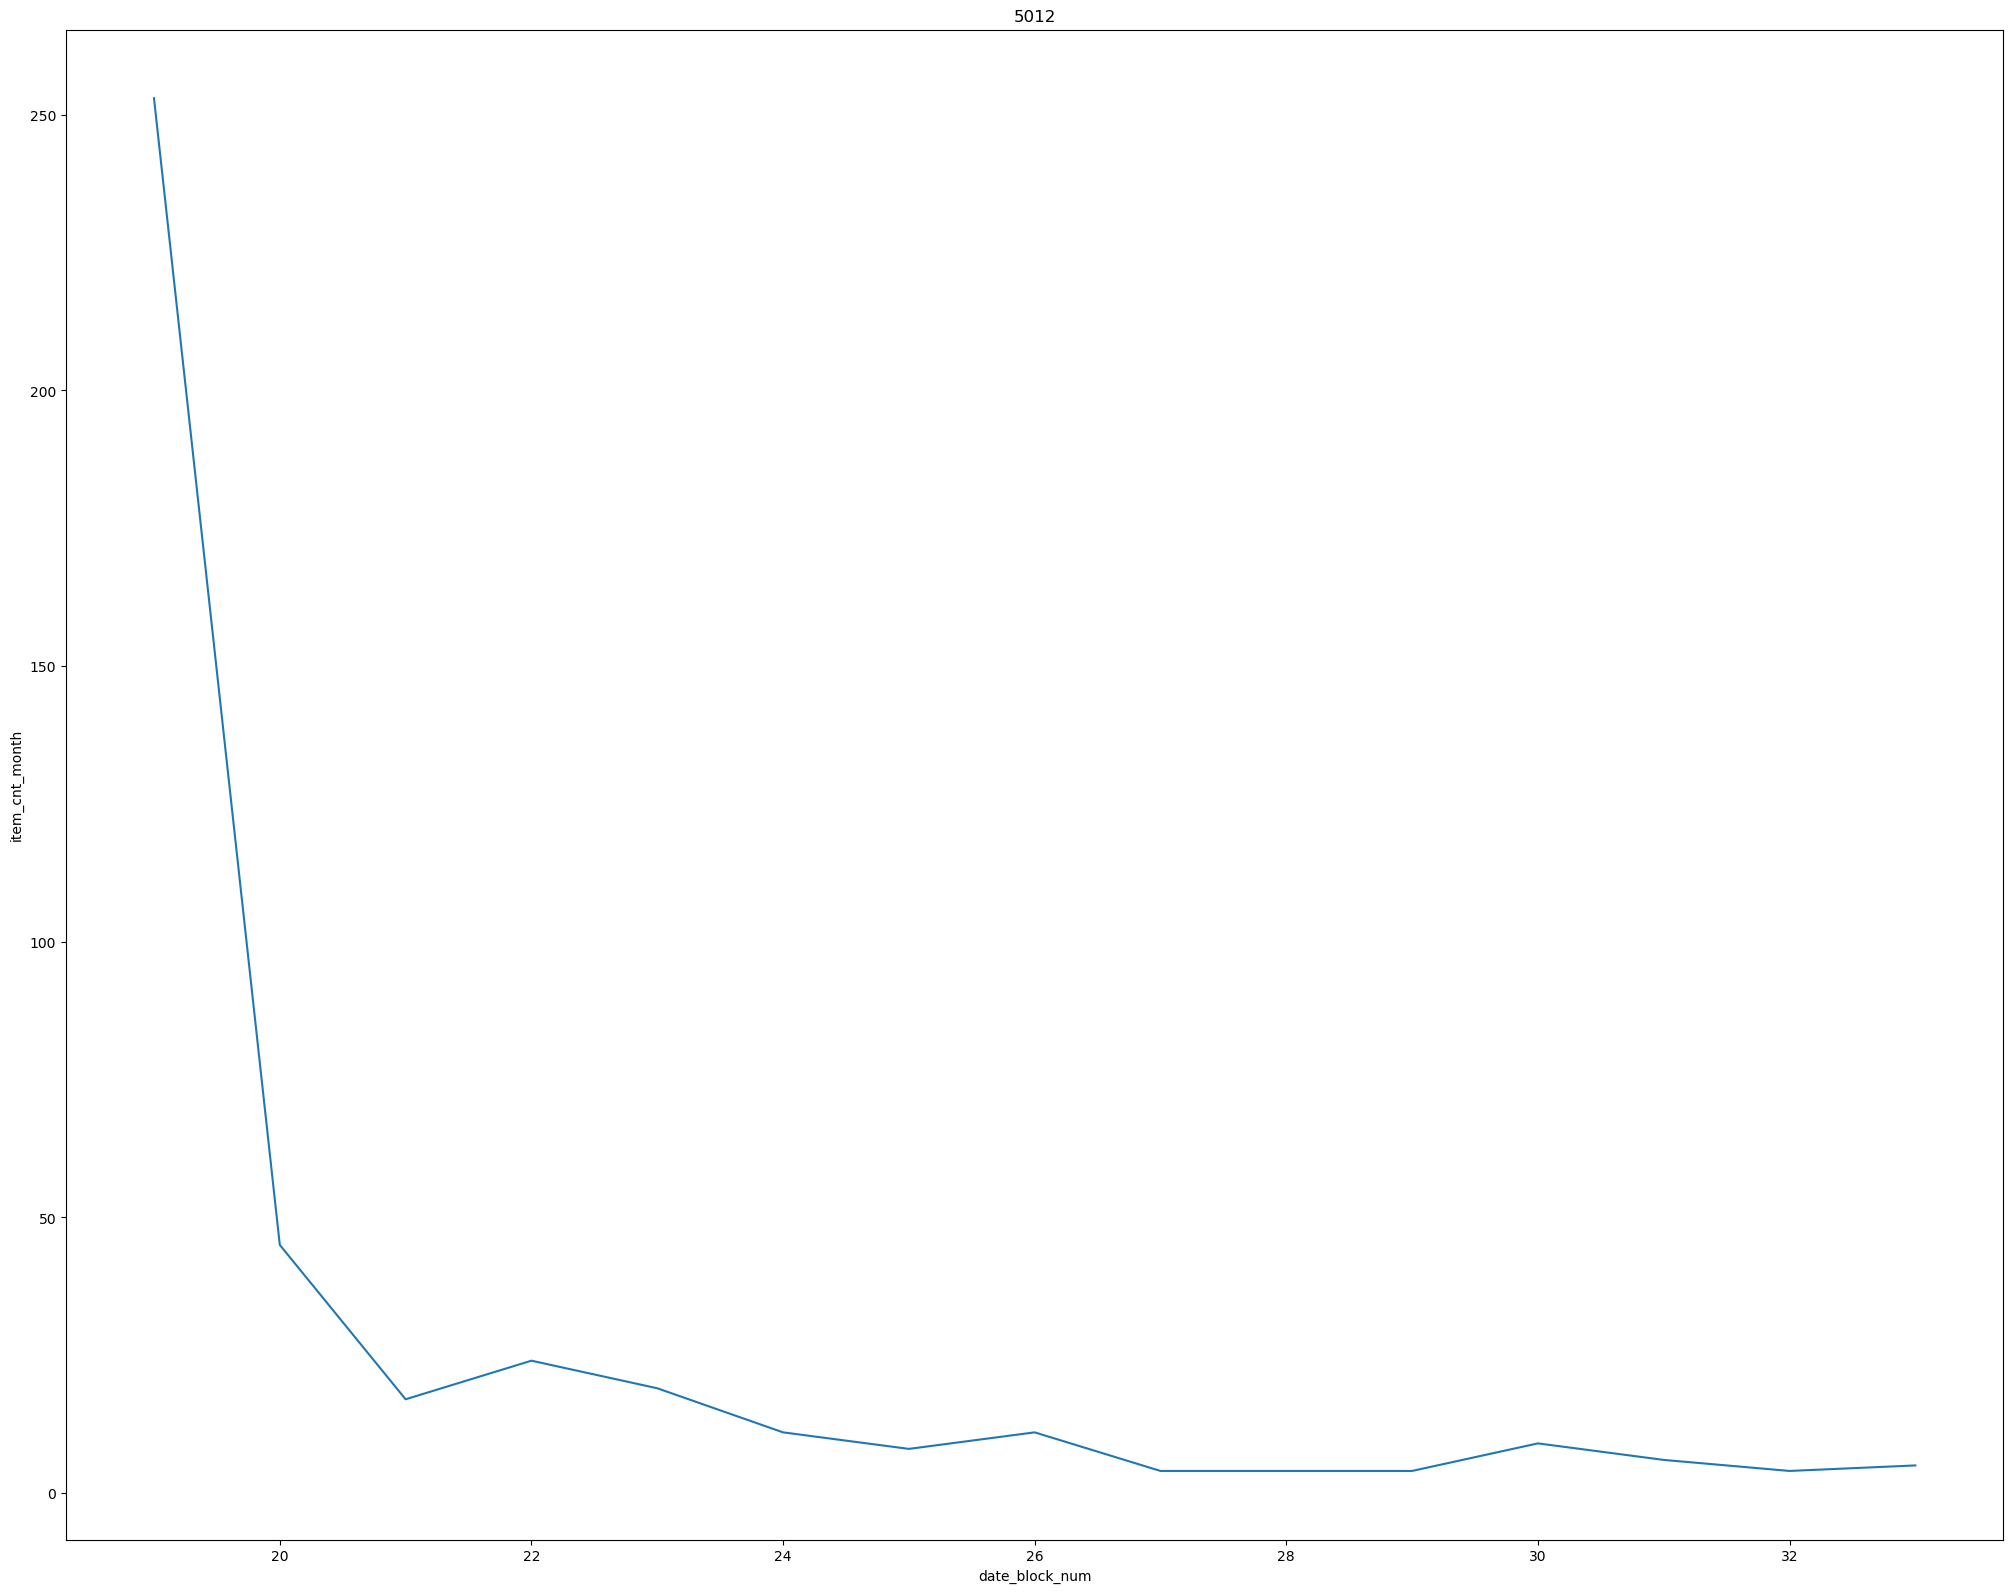

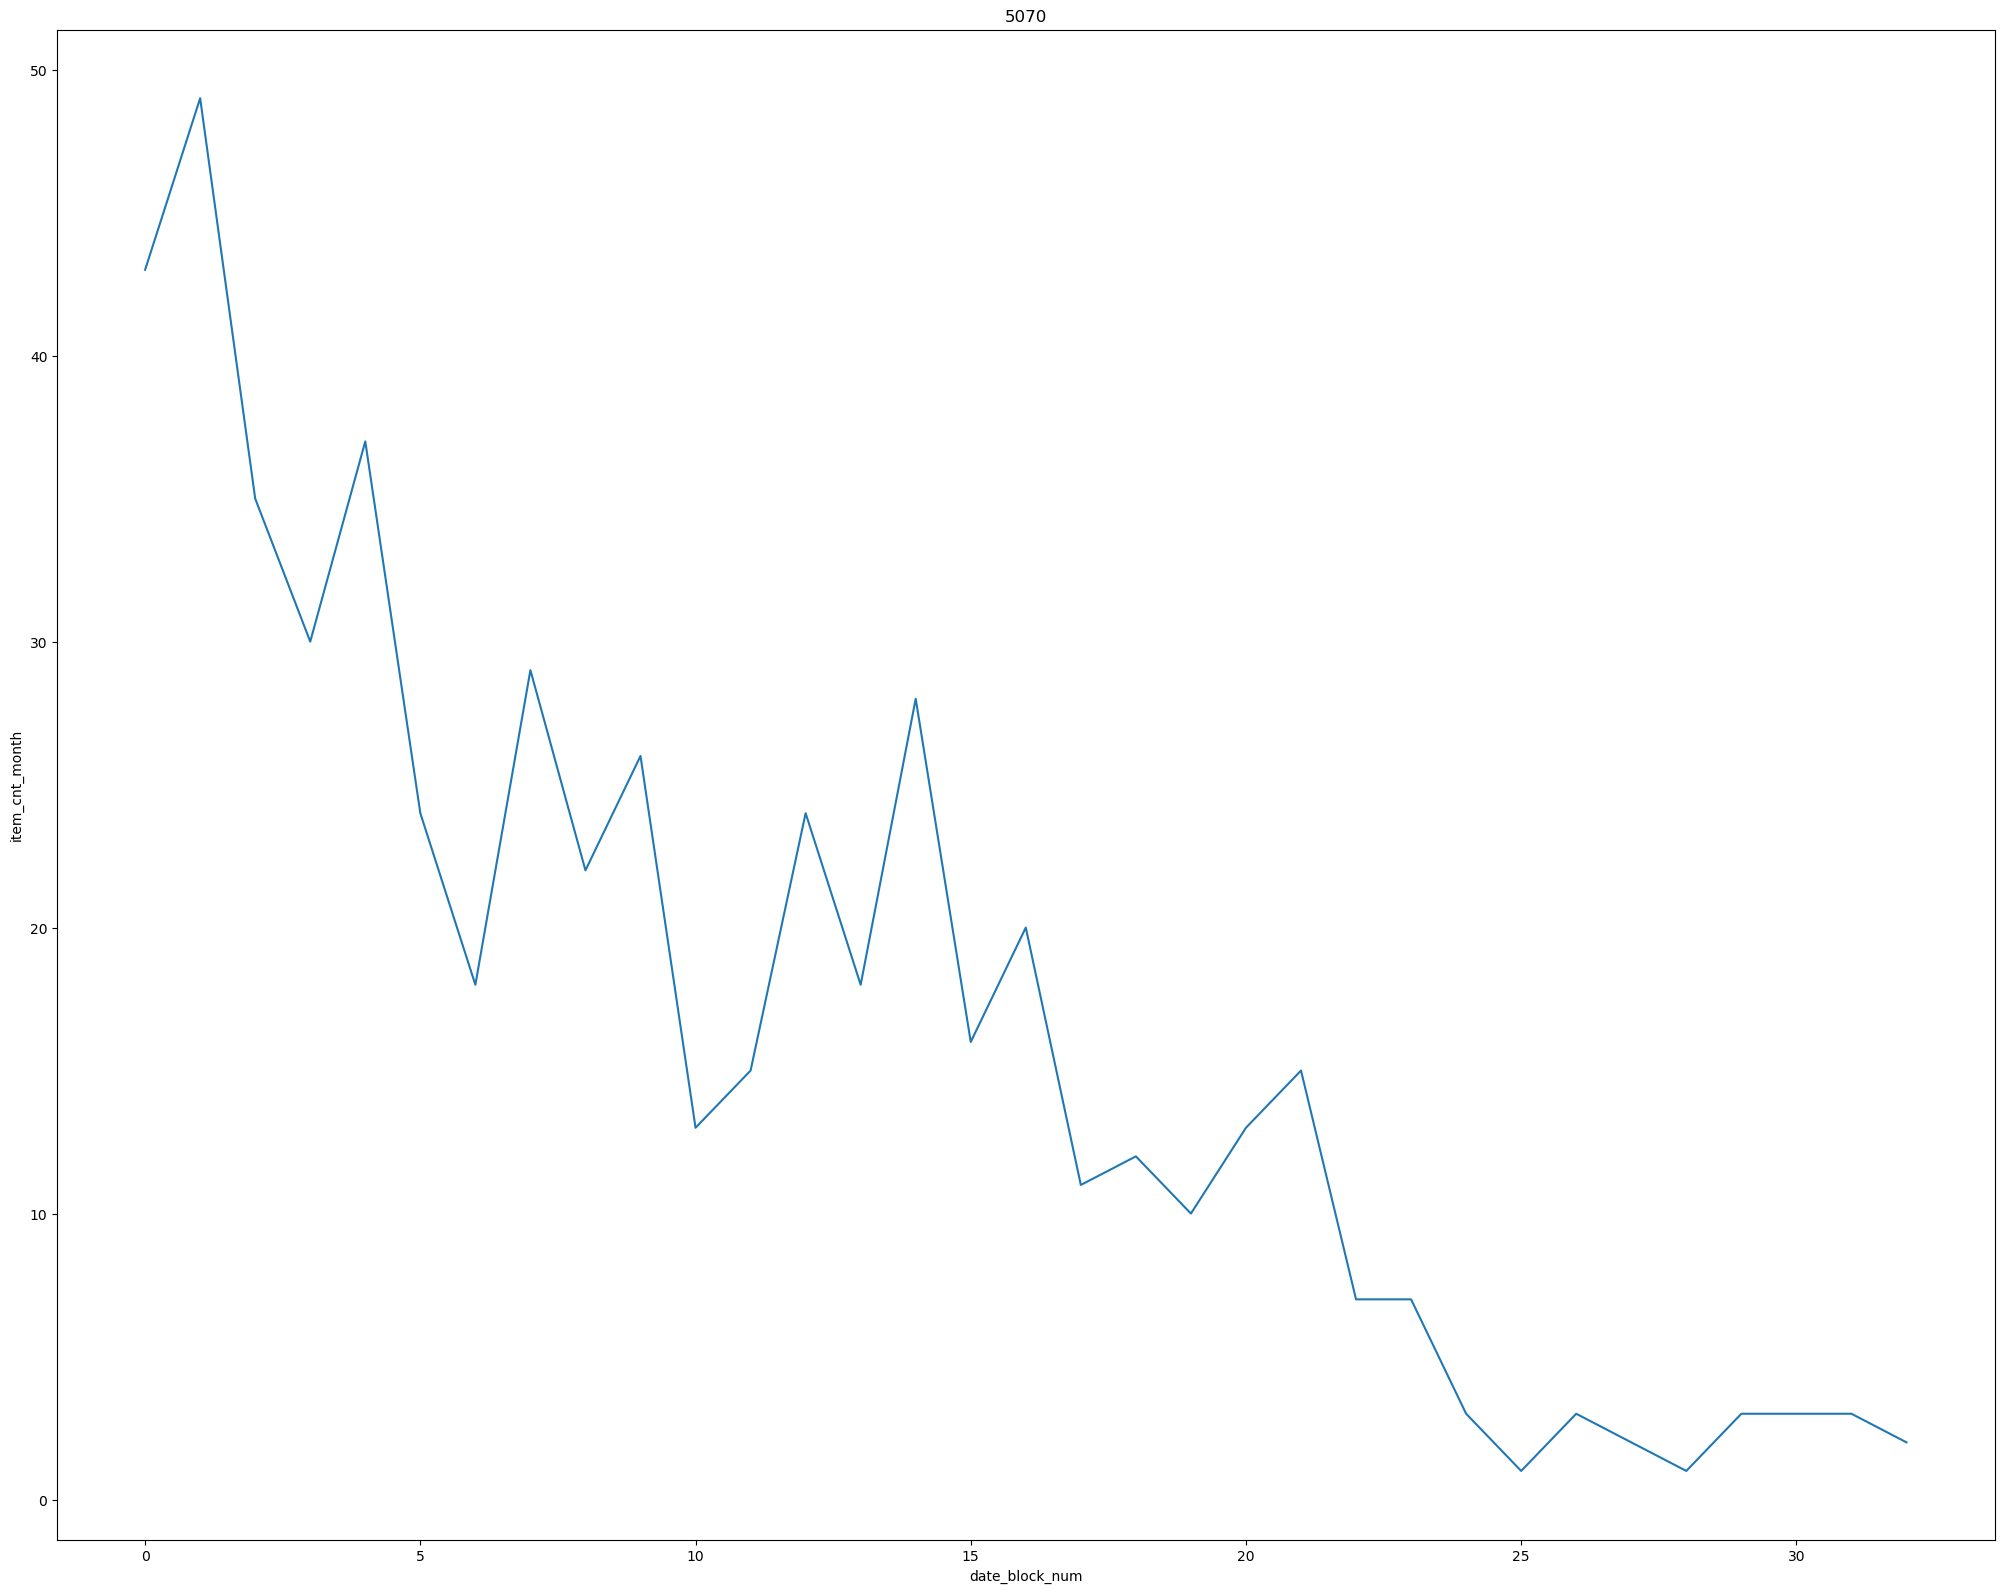

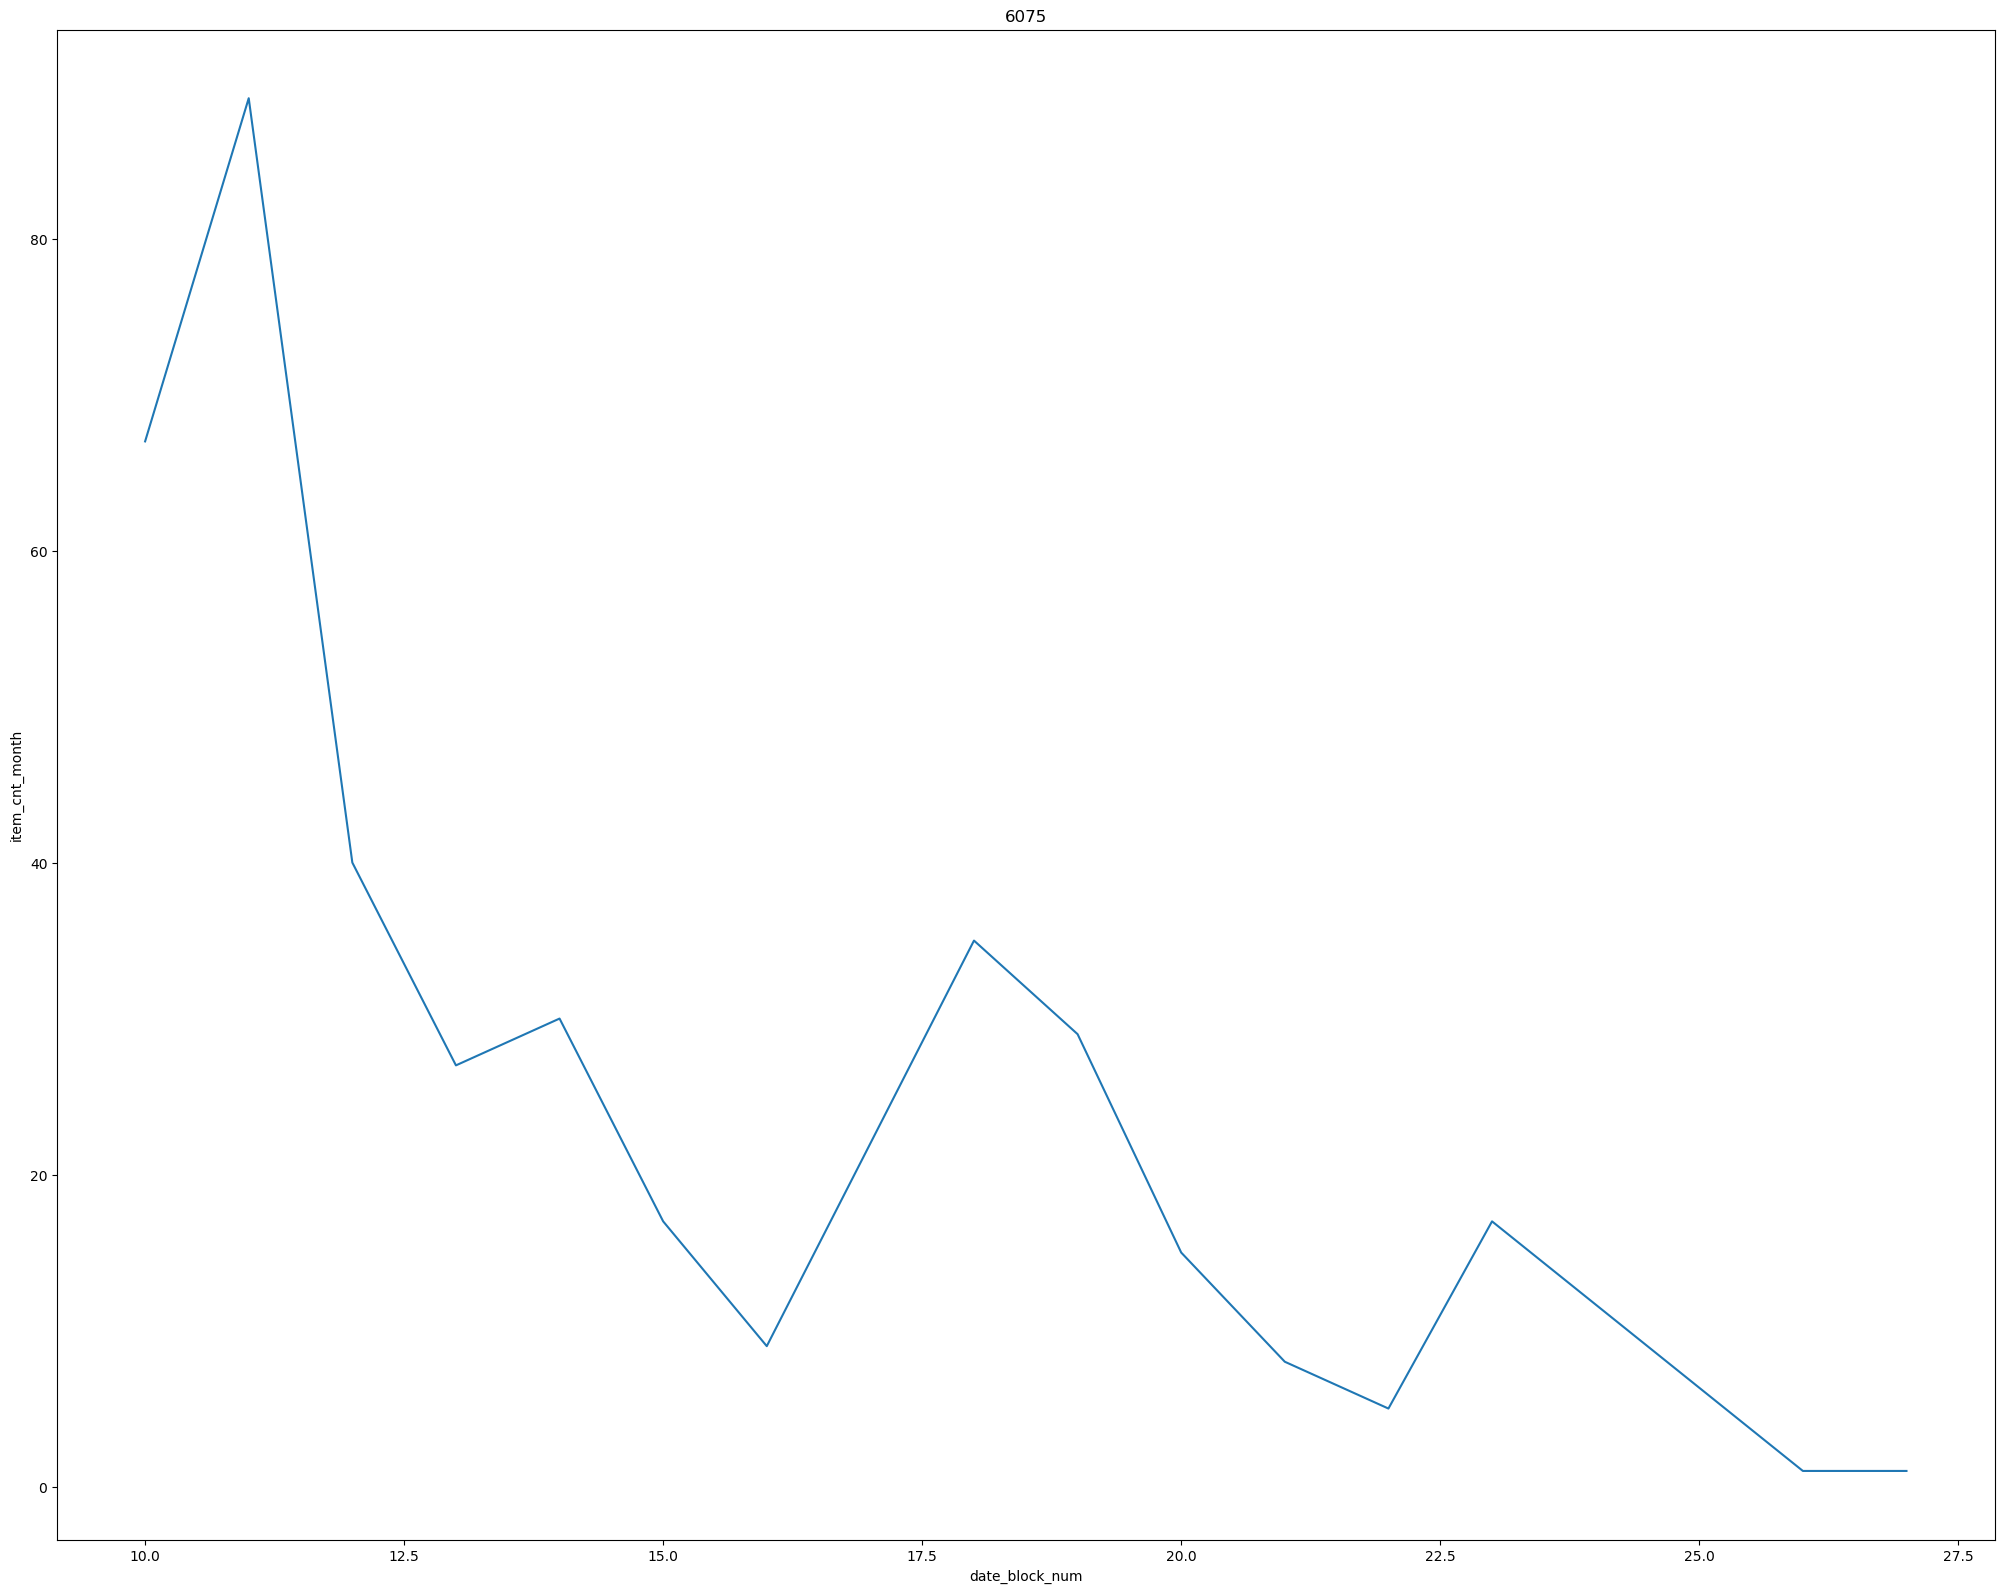

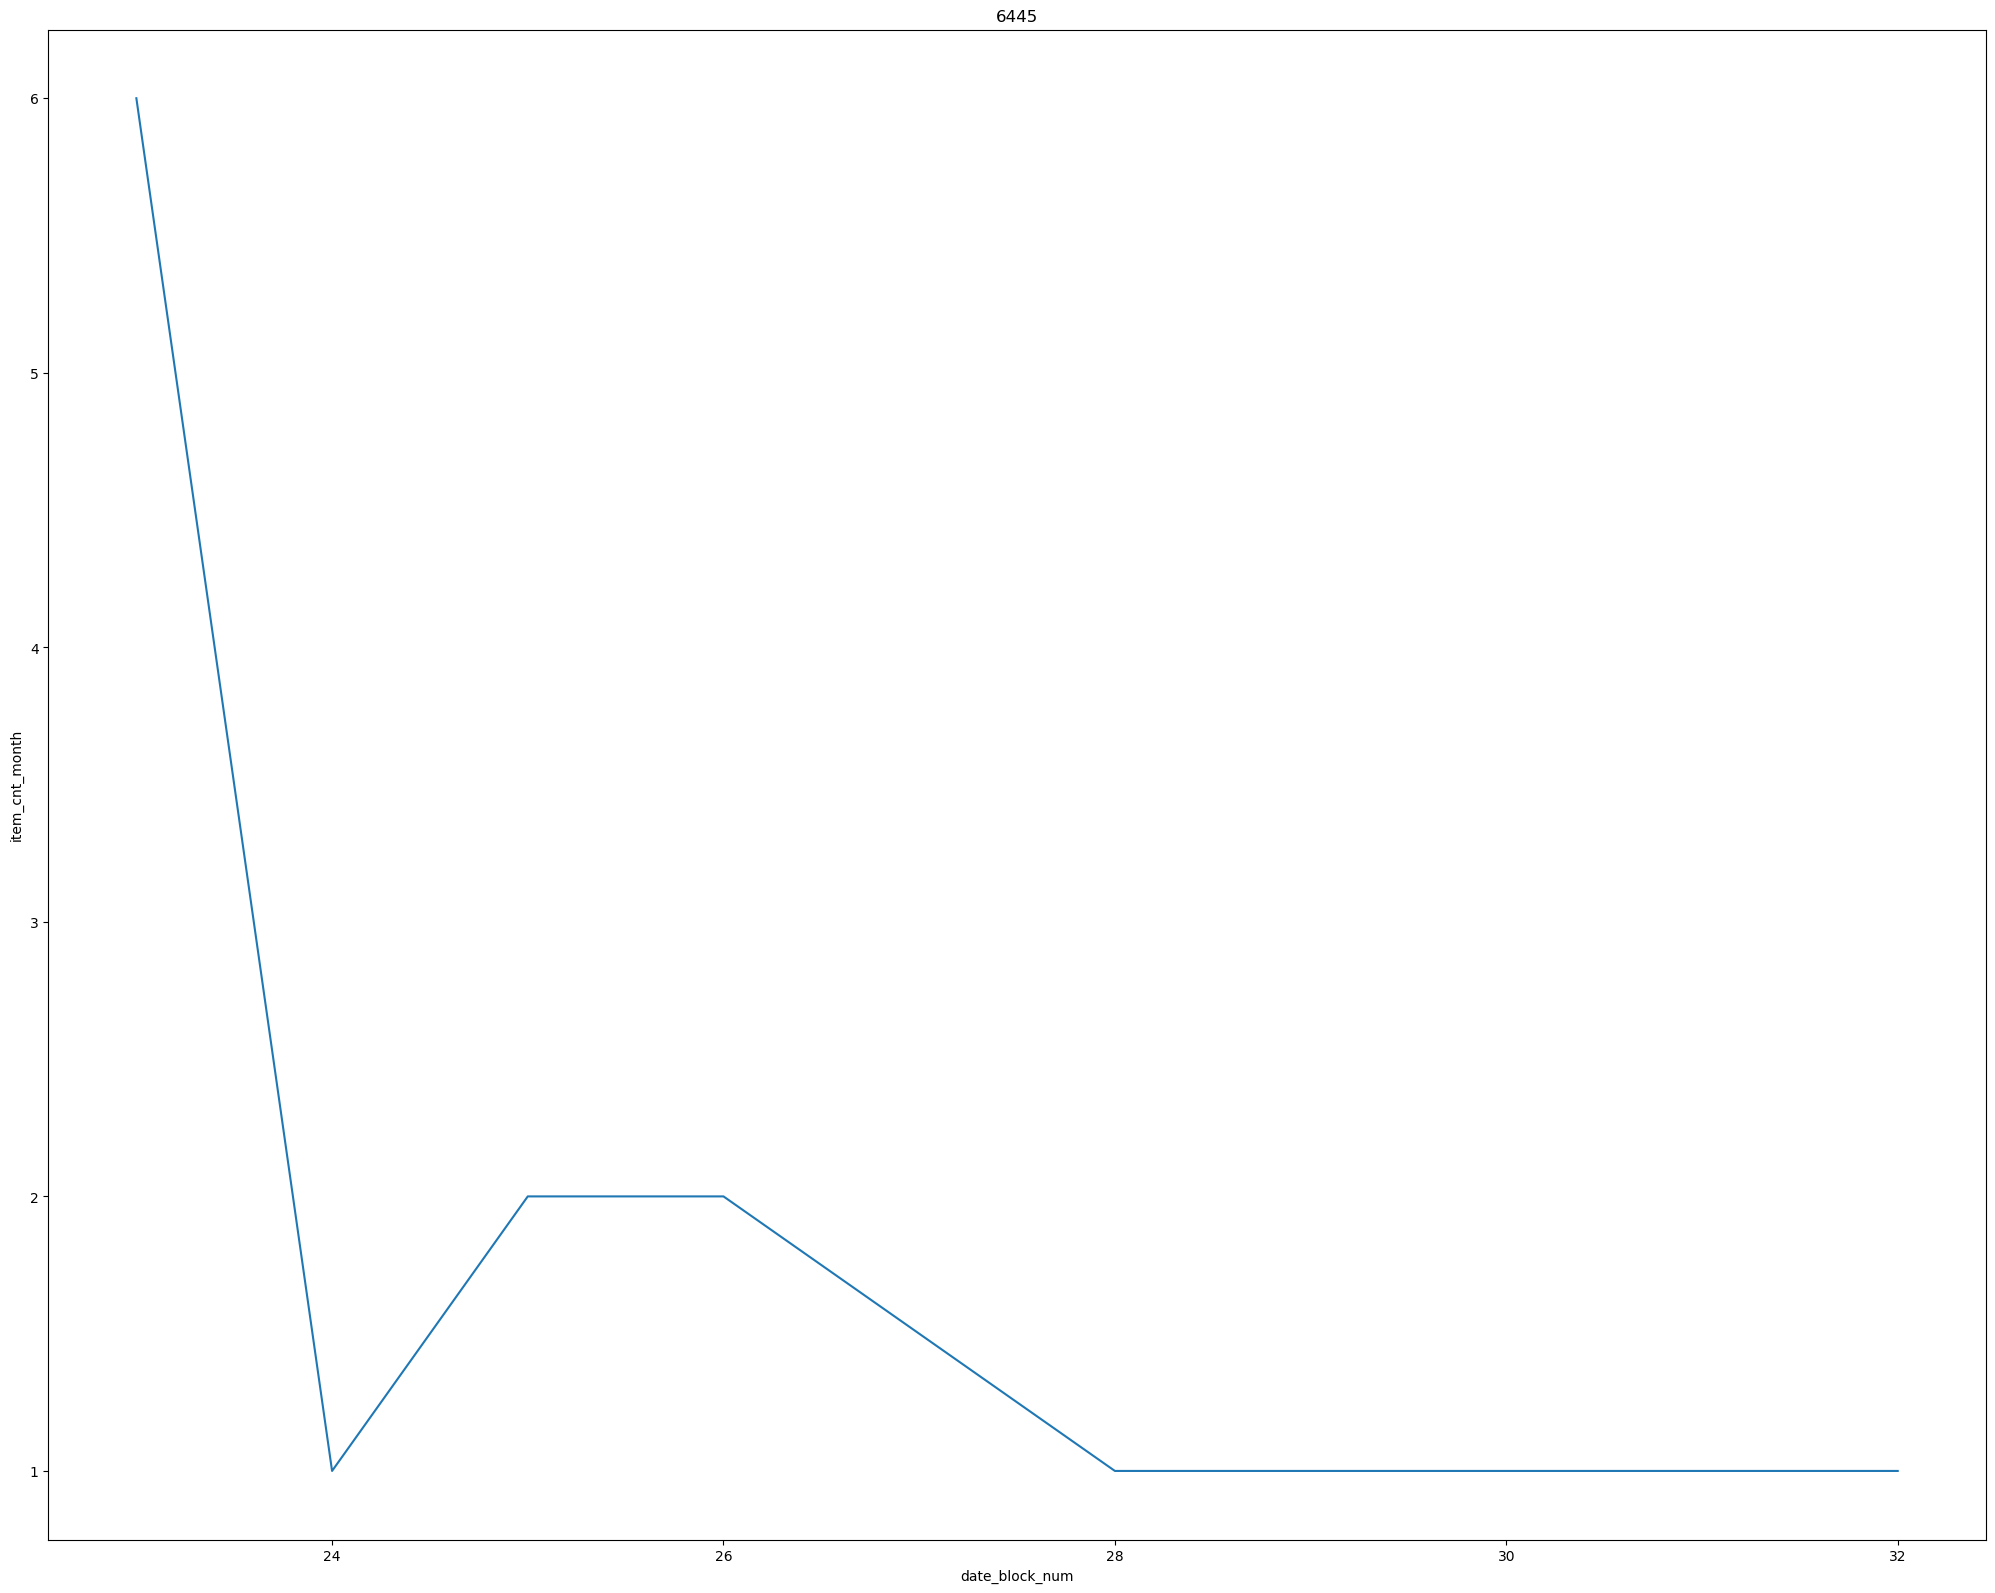

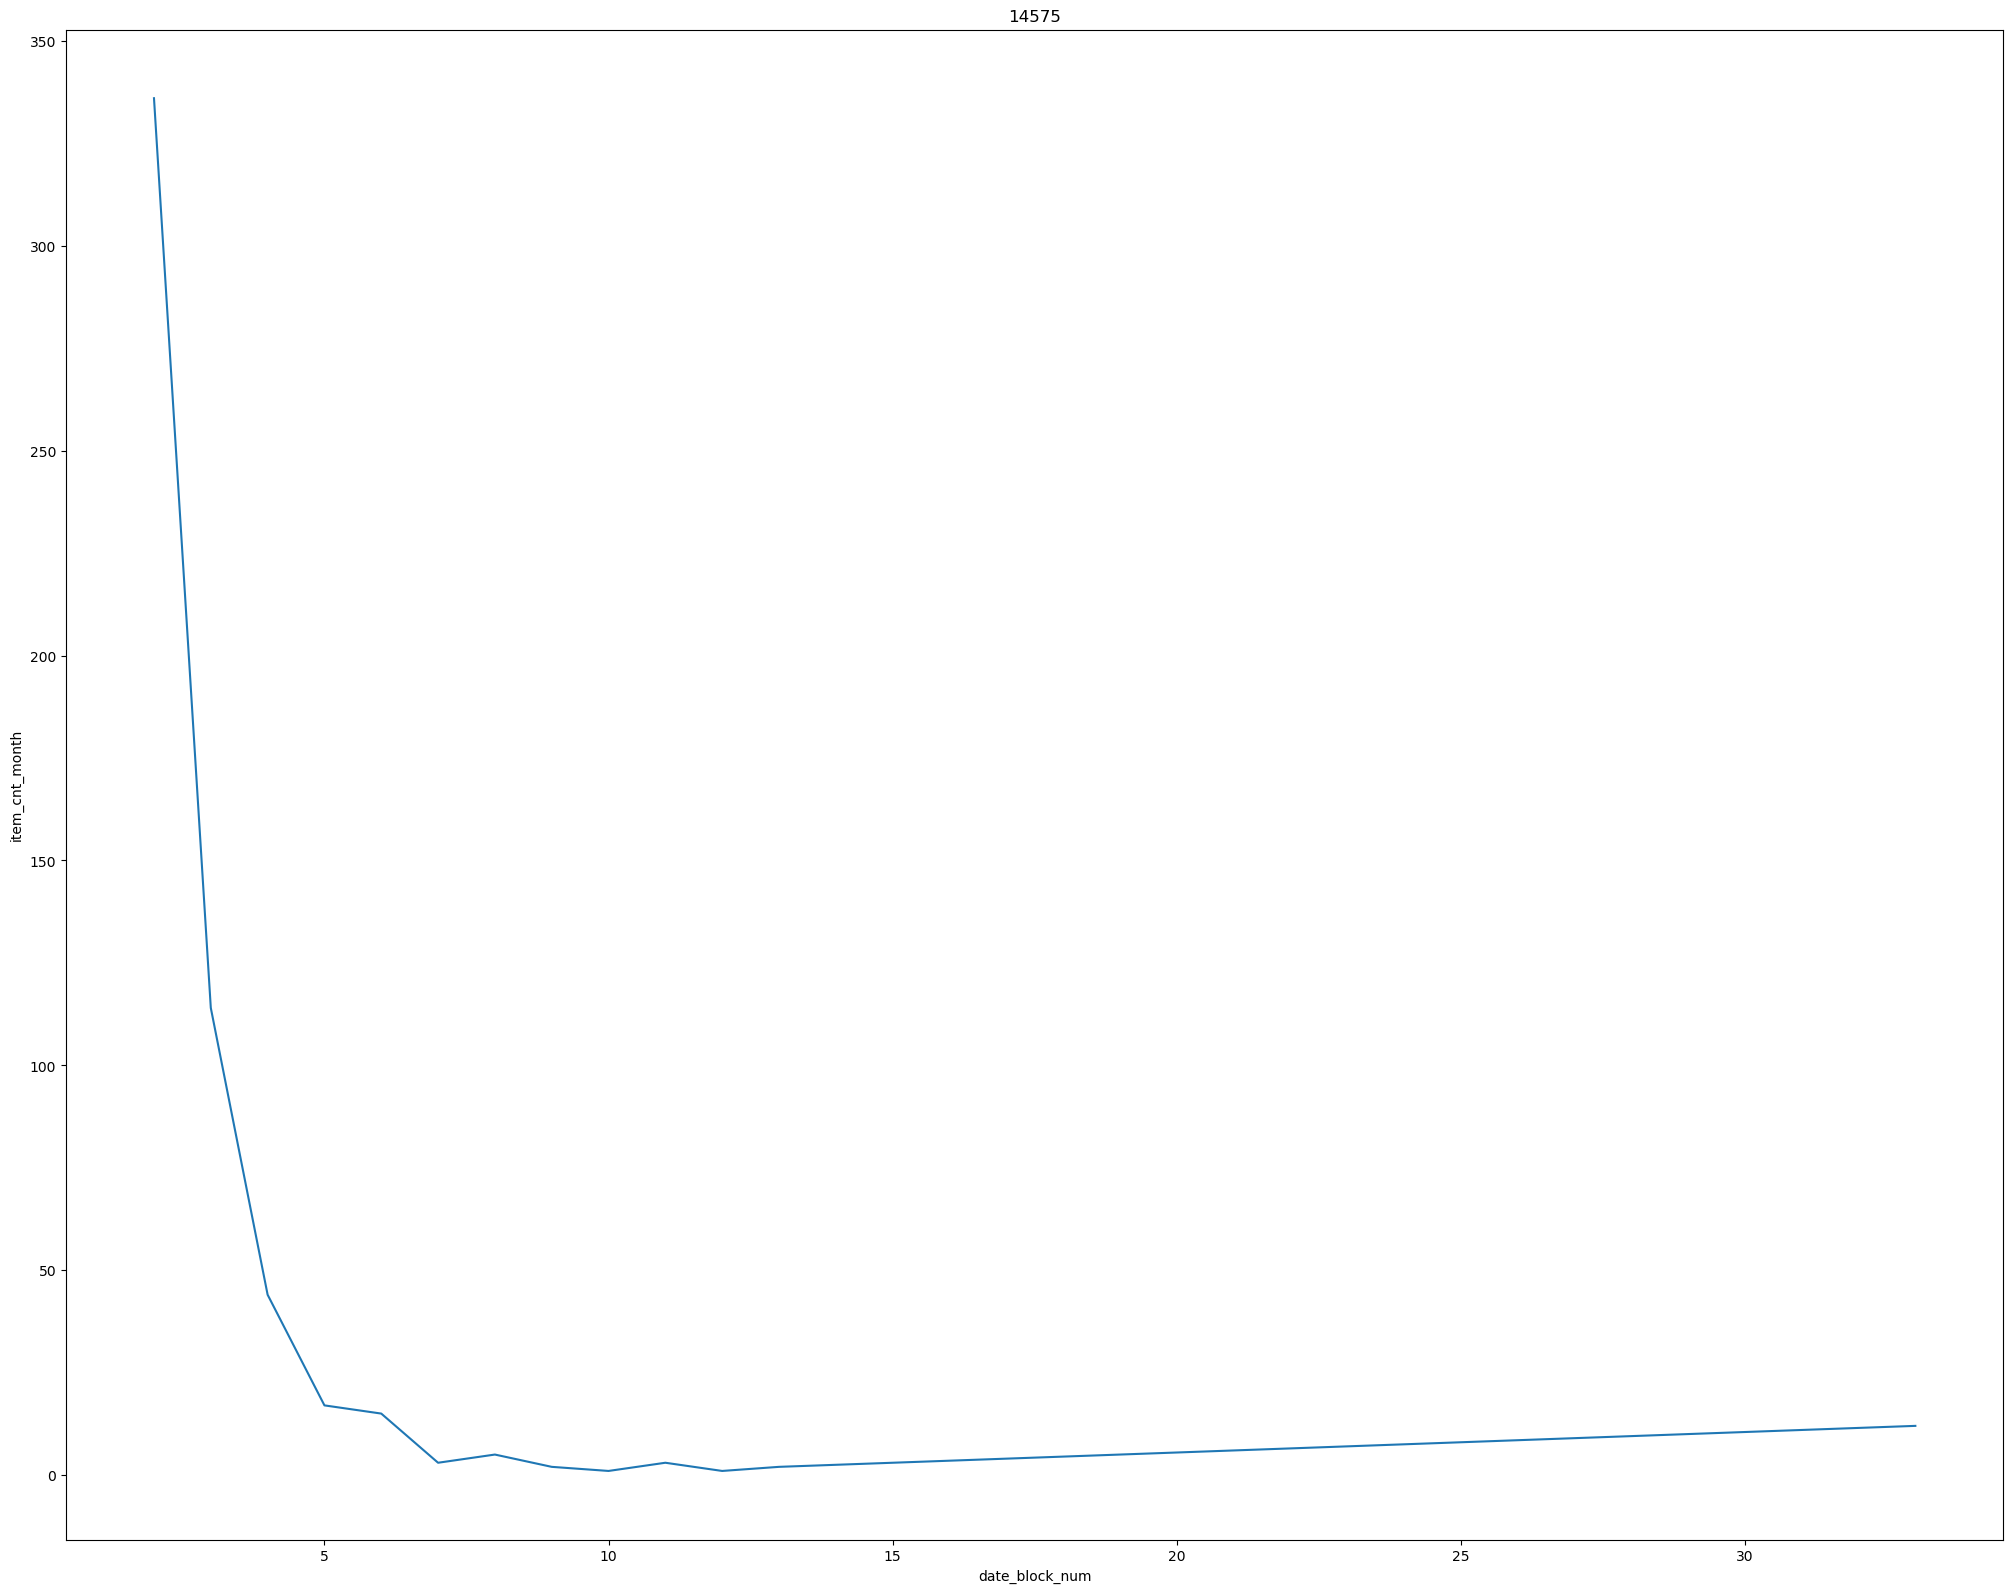

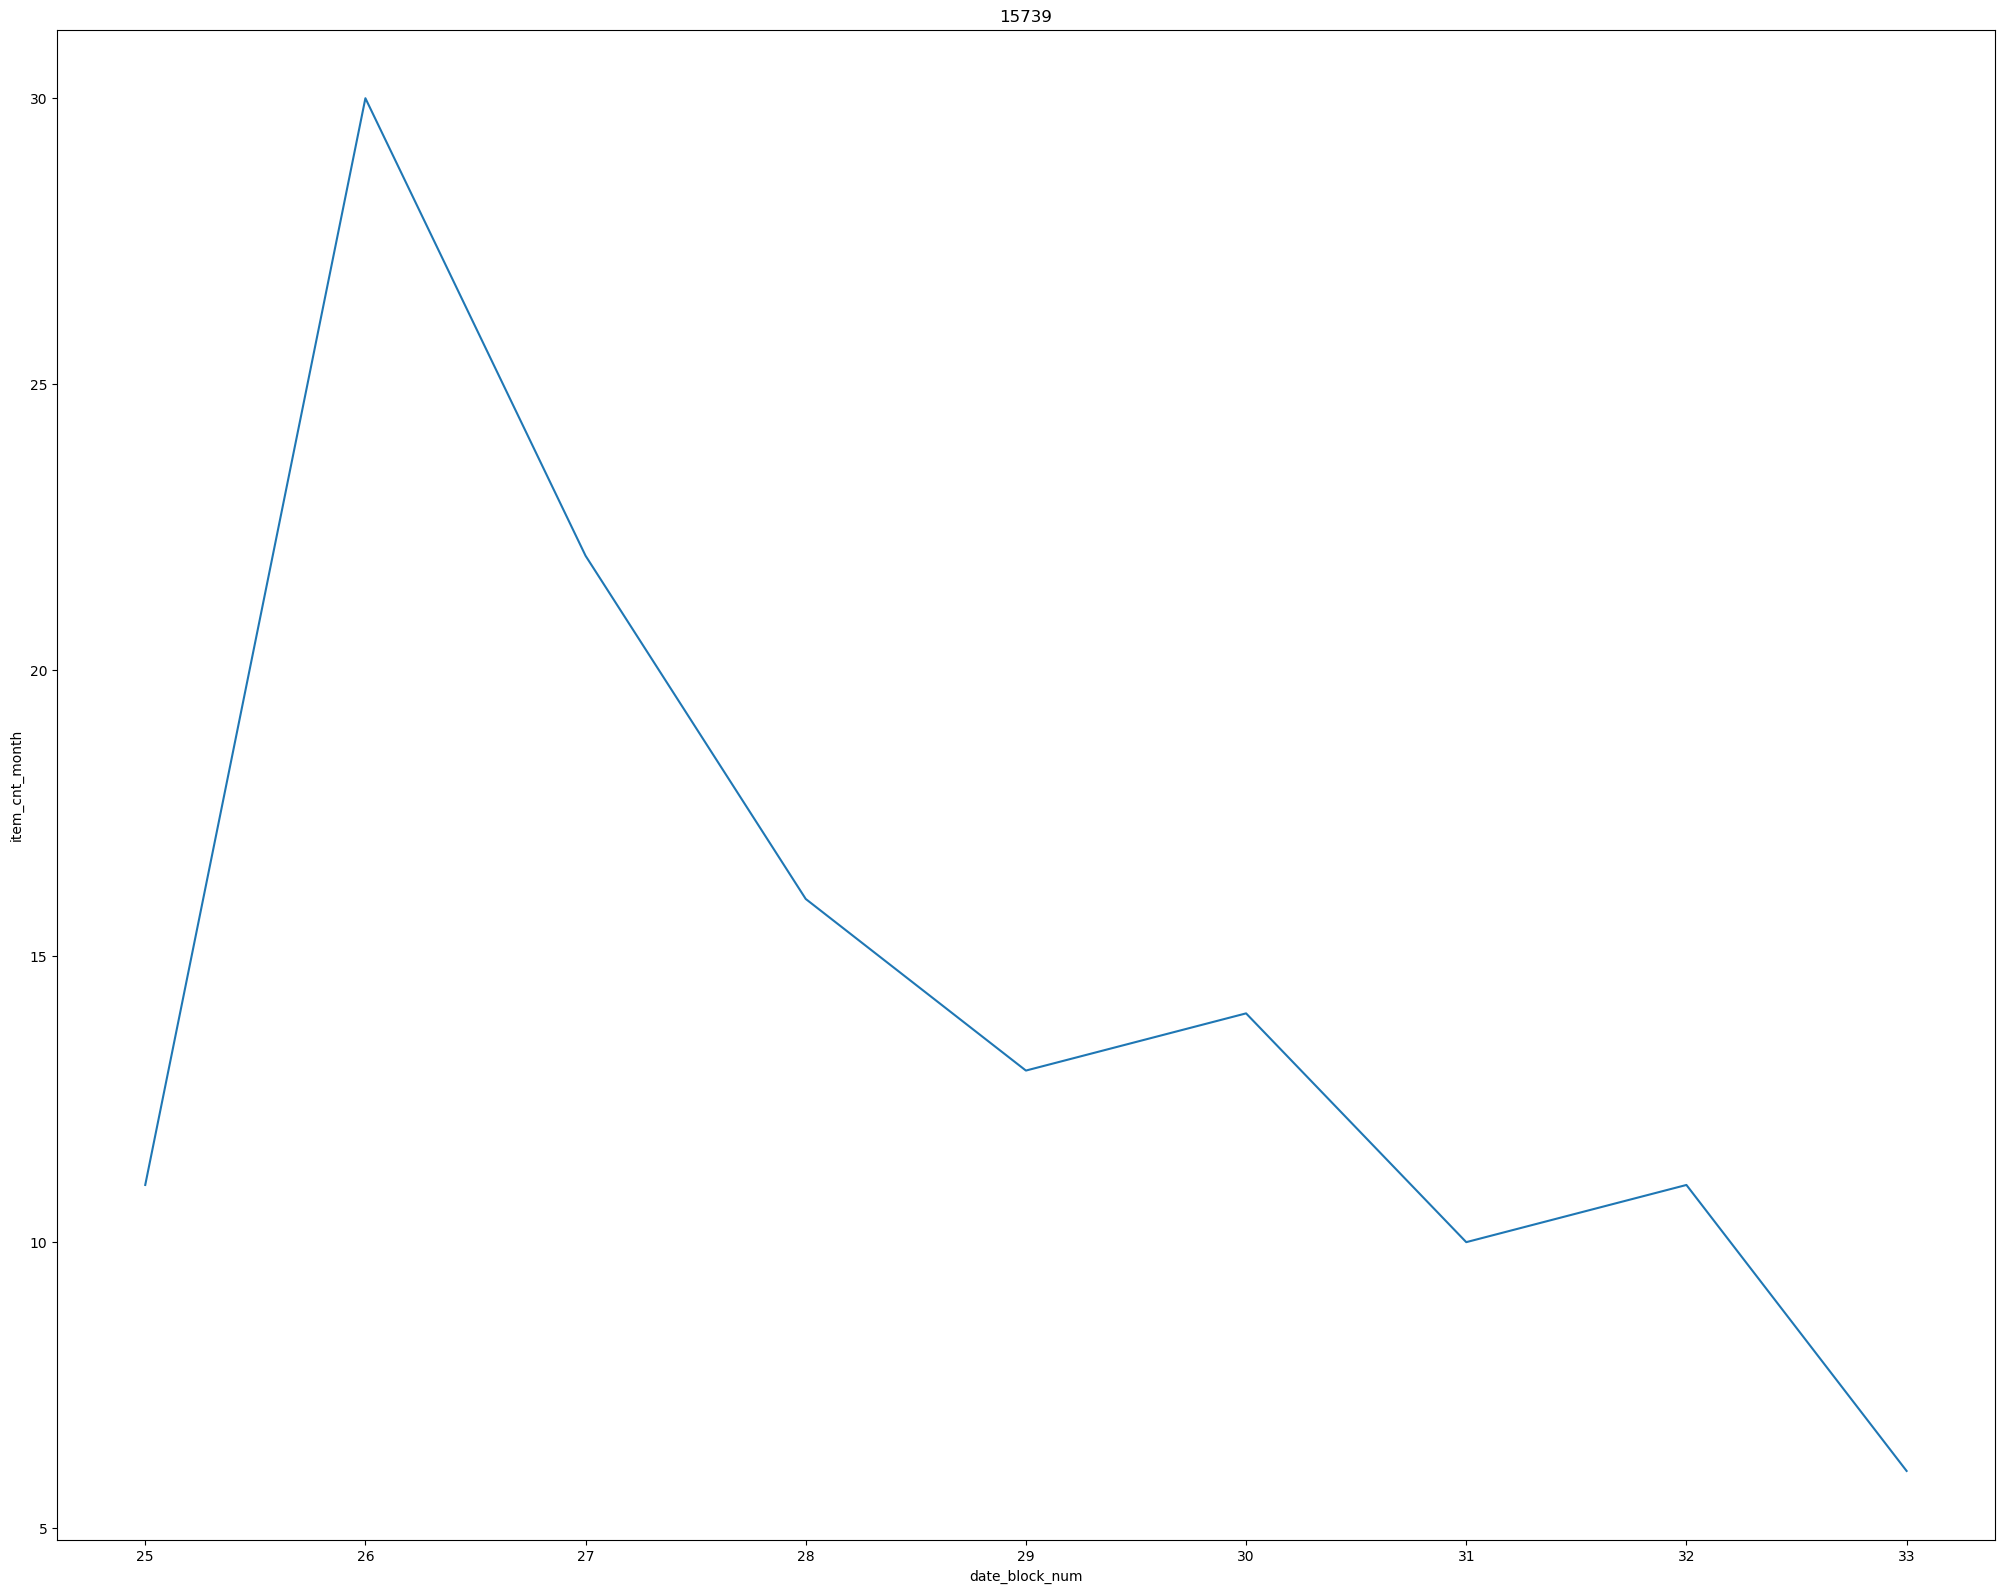

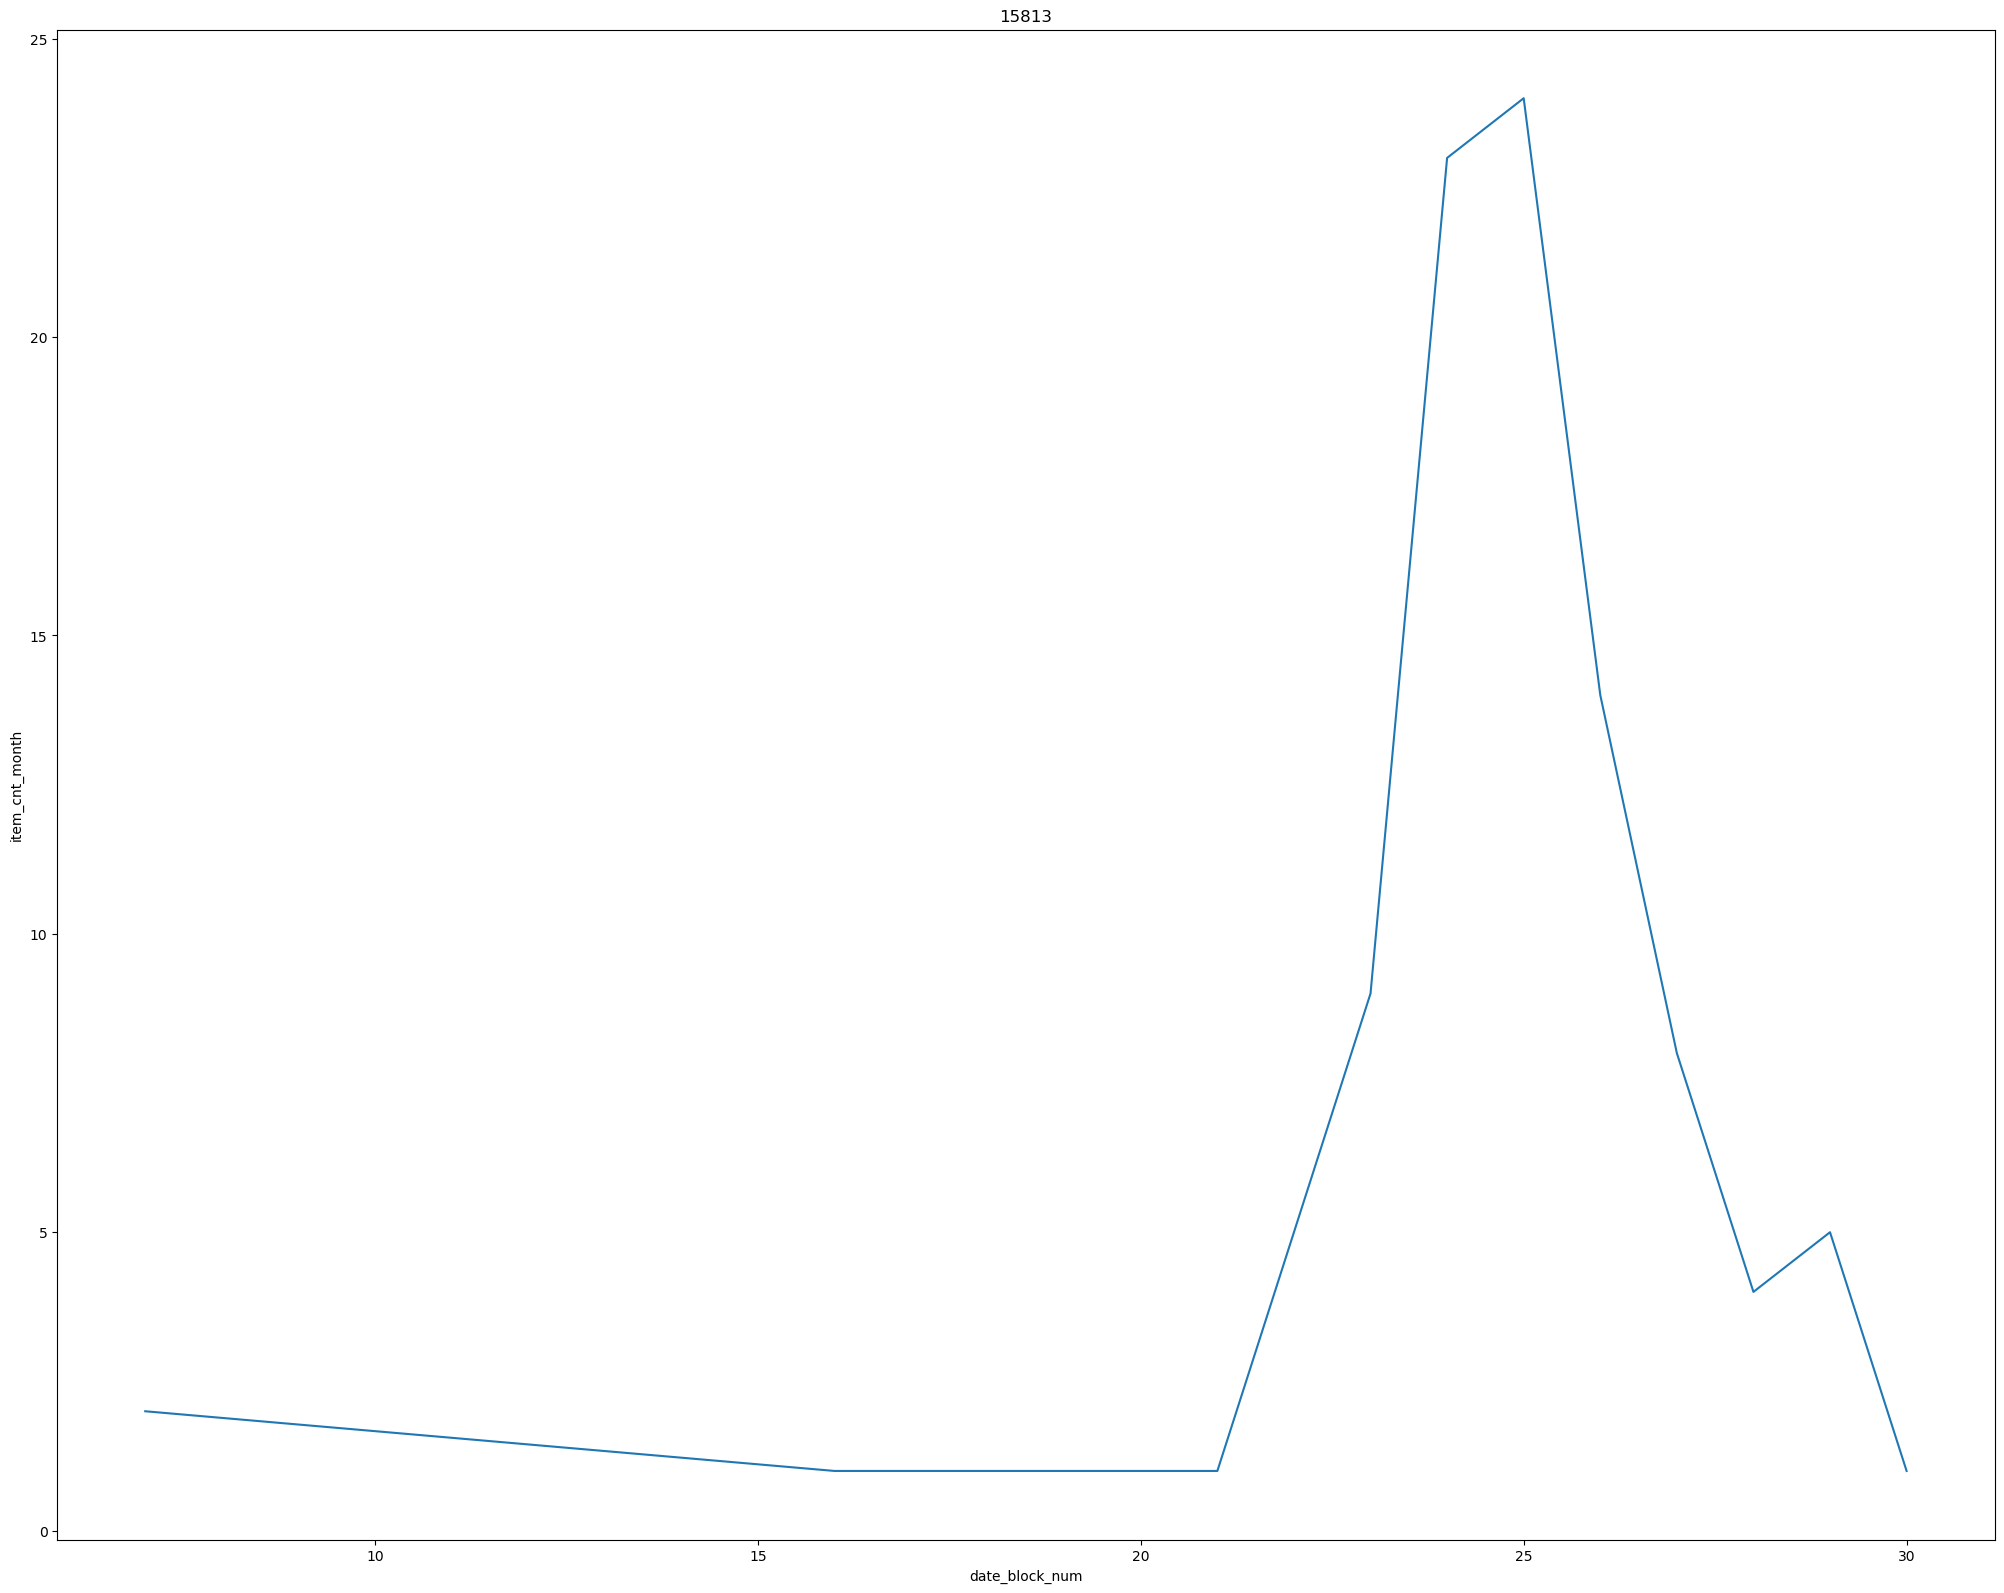

In [37]:
def main():
    for item_id in random_10_sale['item_id'].unique():
        df_each_item = random_10_sale[random_10_sale['item_id'] == item_id]
        plot_each_item(df_each_item, item_id)
main()

## 2. reformat原本aggregated后的monthly数据，成时间序列状。

In [71]:
sales_train_monthly1 = pd.pivot_table(sales_train_monthly, values = 'item_cnt_month', index=['shop_id','item_id'], columns = 'date_block_num').reset_index().rename_axis(None,axis=1)


In [73]:
sales_train_monthly1 = sales_train_monthly1.fillna(0) 
sales_train_monthly1

,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424120,59,22155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424121,59,22162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
424122,59,22164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0


------------------------------------Verify------------------------------------

In [79]:
sales_train_monthly1[(sales_train_monthly1['item_id'] ==5037) & (sales_train_monthly1['shop_id'] ==5)]

,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
24972,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0


## 3. 简单建模，尝试用0-32的月份的数据，去predict“33“的月份。


In [97]:
sales_train_monthly_item = sales_train_monthly1.groupby('item_id',as_index= False).sum()
sales_train_monthly_item.drop(columns = ['shop_id'],inplace = True)

In [105]:
items.shape

(22170, 3)

In [107]:
sales_train_monthly_item.shape

(21807, 35)

The number of items having sales records do not match the total number of items, so we join the two tables together and fill the null values with 0. 

In [101]:
tmp2 = pd.merge(items[['item_id']], sales_train_monthly_item,on='item_id', how='left') 

In [124]:
tmp2 = tmp2.fillna(0)

In [126]:
tmp2

,item_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22165,22165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22166,22166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,8.0,12.0,4.0,8.0,10.0,8.0,11.0,5.0,11.0
22167,22167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,...,33.0,46.0,40.0,38.0,31.0,33.0,34.0,29.0,21.0,37.0
22168,22168,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
X = tmp2.drop(columns = ['item_id',33])
y = tmp2[33].to_numpy()

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [139]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [140]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
model.score(X_test,y_test)

0.783562877527066